In [2]:
%load_ext lab_black

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
from math import log

In [9]:
#####
# Load and Explore the Data
#####
# cleaned_data_df = pd.read_csv("../00_data/Cleaned_Data_22MAR.gz", compression="gzip")
hr_merged_df = pd.read_csv("../00_data/final_data_Apr10.csv")

In [10]:
hr_merged_df.rename(
    columns={"searchedDate": "Time"},
    inplace=True,
)

In [11]:
hr_merged_df.columns

Index(['Unnamed: 0', 'viewCount', 'likeCount', 'dislikeCount',
       'num_days_since_pub', 'viewcounts_weighted', 'like_count_weighted',
       'dislike_count_weighted', 'like_dislike_ratio',
       'weighted_like_dislike_ratio',
       'like_dislike_ratio_by_viewcounts_weighted',
       'videoTitleSentimentScore_vader_pos',
       'videoTitleSentimentScore_vader_com', 'captionSentimentScore_vader_pos',
       'captionSentimentScore_vader_neg', 'captionSentimentScore_vader_com',
       'falir_videoTitle_score',
       'caption_list_split_by_nvidia_10words_flairscores',
       'caption_list_split_by_nvidia_20words_flairscores',
       'caption_list_split_by_nvidia_35words_flairscores',
       'caption_list_split_by_nvidia_10words_vaderscores',
       'caption_list_split_by_nvidia_20words_vaderscores',
       'caption_list_split_by_nvidia_35words_vaderscores', 'msft', 'amd',
       'ndaq', 'intel', 'qualcomm', 'apple', 'pred_24', 'pred_48', 'pred_72',
       'percent_change_24', 'percen

In [12]:
cleaned_data_df[cleaned_data_df["VideoTitle"].isna()]["videoID"].nunique()

NameError: name 'cleaned_data_df' is not defined

In [13]:
cleaned_data_df["videoID"].nunique()

NameError: name 'cleaned_data_df' is not defined

In [ ]:
cleaned_data_df

In [14]:
hr_merged_df_non_scaled = hr_merged_df.copy()

In [22]:
#####
# Normalize the data
#####

from sklearn import preprocessing

columns = hr_merged_df.columns

# #Print columns to refernce for normlization
# for i in range(len(columns)):
#     print(columns[i])
#     pass

column_names_to_normalize = [
    "viewCount",
    "likeCount",
    "dislikeCount",
    "num_days_since_pub",
    "viewcounts_weighted",
    "like_count_weighted",
    "dislike_count_weighted",
    "like_dislike_ratio",
    "weighted_like_dislike_ratio",
    "like_dislike_ratio_by_viewcounts_weighted",
    "videoTitleSentimentScore_vader_pos",
    "videoTitleSentimentScore_vader_com",
    "captionSentimentScore_vader_pos",
    "captionSentimentScore_vader_neg",
    "captionSentimentScore_vader_com",
    "falir_videoTitle_score",
    "caption_list_split_by_nvidia_10words_flairscores",
    "caption_list_split_by_nvidia_20words_flairscores",
    "caption_list_split_by_nvidia_35words_flairscores",
    "caption_list_split_by_nvidia_10words_vaderscores",
    "caption_list_split_by_nvidia_20words_vaderscores",
    "caption_list_split_by_nvidia_35words_vaderscores",
]

hr_merged_df_scaled = hr_merged_df.copy()

scaler = preprocessing.StandardScaler().fit(hr_merged_df[column_names_to_normalize])
hr_merged_df[column_names_to_normalize] = scaler.fit_transform(
    hr_merged_df[column_names_to_normalize]
)
hr_merged_df_scaled[column_names_to_normalize] = scaler.fit_transform(
    hr_merged_df_scaled[column_names_to_normalize]
)

# min_max_scaler = preprocessing.MinMaxScaler().fit(
#     hr_merged_df_normal[column_names_to_normalize]
# )

# hr_merged_df_normal[column_names_to_normalize] = min_max_scaler.fit_transform(
#     hr_merged_df_normal[column_names_to_normalize]
# )

In [23]:
# hr_merged_df_normal["Time"] = pd.to_datetime(
#     hr_merged_df_normal["Time"], format="%Y-%m-%d %H:%M", utc=True
# ).dt.date

hr_merged_df_scaled["Time"] = pd.to_datetime(
    hr_merged_df_scaled["Time"], format="%Y-%m-%d %H:%M", utc=True
).dt.date

KeyError: 'Time'

In [20]:
hr_merged_df_normal["product_videosent"] = (
    hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
    * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
)

NameError: name 'hr_merged_df_normal' is not defined

In [6]:
hr_merged_df_normal.Time.tail()

NameError: name 'hr_merged_df_normal' is not defined

In [14]:
corr = hr_merged_df_normal.corr()

In [1]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    cbar_kws={"shrink": 0.5},
)

plt.title("asdlfkjasd")

NameError: name 'np' is not defined

In [46]:
hr_merged_df_scaled.dtypes

Unnamed: 0                                            int64
viewCount                                           float64
likeCount                                           float64
dislikeCount                                        float64
num_days_since_pub                                  float64
viewcounts_weighted                                 float64
like_count_weighted                                 float64
dislike_count_weighted                              float64
like_dislike_ratio                                  float64
weighted_like_dislike_ratio                         float64
like_dislike_ratio_by_viewcounts_weighted           float64
videoTitleSentimentScore_vader_pos                  float64
videoTitleSentimentScore_vader_neg                  float64
videoTitleSentimentScore_vader_com                  float64
captionSentimentScore_vader_pos                     float64
captionSentimentScore_vader_neg                     float64
captionSentimentScore_vader_com         

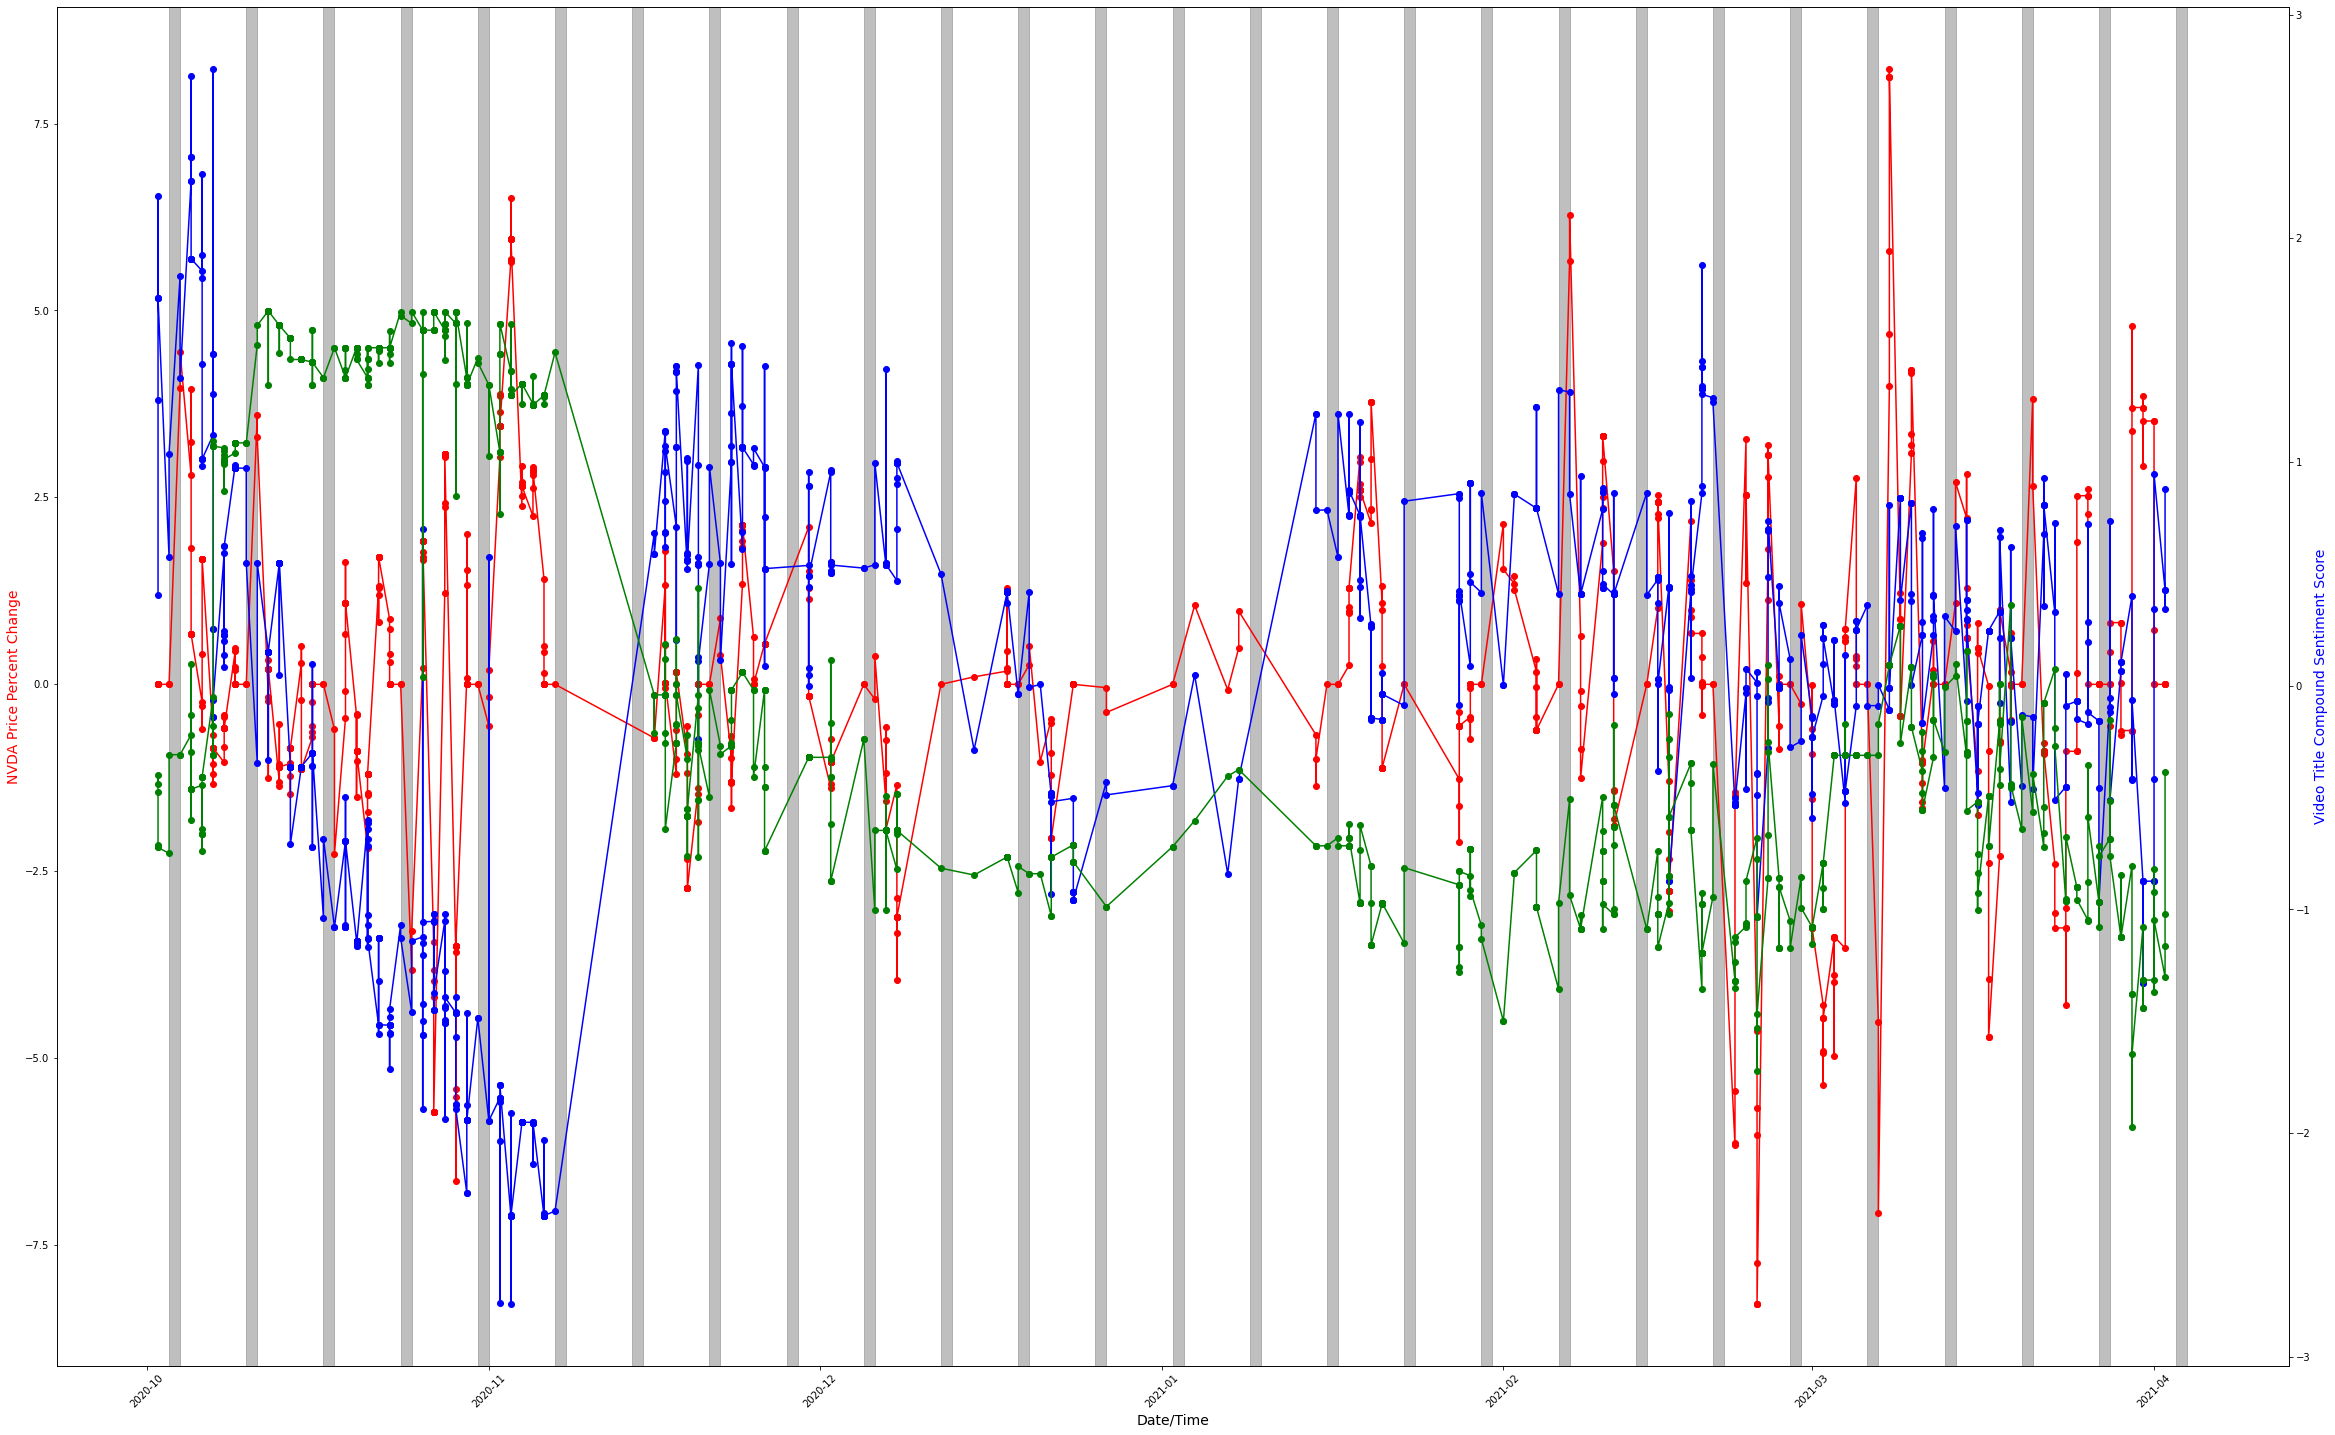

In [53]:
x = pd.DataFrame(hr_merged_df_scaled.Time)
# print(full_joined_df["compound"])
y = pd.DataFrame(hr_merged_df_scaled["videoTitleSentimentScore_vader_com"])

# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(40, 25))
# make a plot

ax.plot(
    hr_merged_df_scaled.Time,
    hr_merged_df_scaled.percent_change_24,
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Date/Time", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change", color="red", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(
    hr_merged_df_normal.Time,
    hr_merged_df_scaled["falir_videoTitle_score"],
    color="blue",
    marker="o",
)

ax2.plot(
    hr_merged_df_normal.Time,
    hr_merged_df_scaled["videoTitleSentimentScore_vader_com"],
    color="green",
    marker="o",
)
ax2.set_ylabel("Video Title Compound Sentiment Score", color="blue", fontsize=14)


def find_weekend_indices(datetime_array):
    indices = []
    for i in range(len(datetime_array)):
        if datetime_array[i].weekday() >= 5:
            indices.append(i)
    return indices


indices = find_weekend_indices(hr_merged_df_normal.Time)
# print(indices)

sat = hr_merged_df_normal.Time[indices[0]]
sun = hr_merged_df_normal.Time[indices[0]] + timedelta(days=1)
for i in range(
    round(
        int(
            (
                hr_merged_df_normal.Time[indices[-1]]
                - hr_merged_df_normal.Time[indices[0]]
            ).days
        )
        / 7
    )
    + 2
):
    ax.axvspan(sat, sun, alpha=0.5, color="gray")
    sat += timedelta(days=7)
    sun += timedelta(days=7)

plt.show()
# save the plot as a file
# fig.savefig(
#     "../20_graphics/NVDA_Sentiment_Stock_ComparisonPlot.jpeg",
#     format="jpeg",
#     dpi=200,
#     bbox_inches="tight",
# )

#### Old Plots

In [19]:
#####
# Distrpution Plots
#####

C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1.,  1.,  1.,  6., 15., 30., 87., 56., 86., 53., 45., 76., 34.,
        43., 20.,  7.,  1.,  0.,  1.,  2., 29.,  1., 62., 72., 75.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

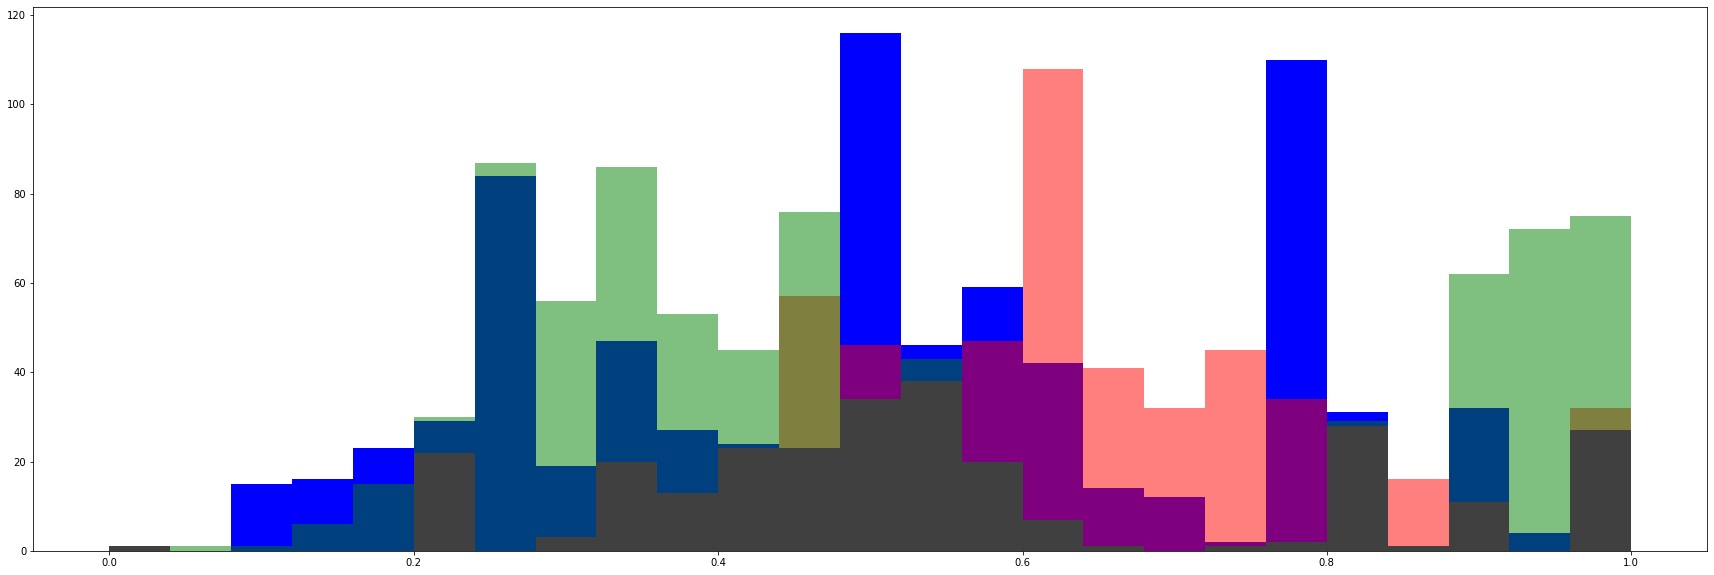

In [20]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_pos"], color="blue", bins=25
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_neg"],
    color="red",
    alpha=0.5,
    bins=25,
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_com"],
    color="green",
    alpha=0.5,
    bins=25,
)

In [21]:
hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]

0      0.329956
1      0.516153
2      0.460352
3      0.516153
4      0.516153
         ...   
799    0.837004
800    0.592511
801    0.704112
802    0.704112
803    0.544053
Name: videoTitleSentimentScore_vader_pos, Length: 804, dtype: float64

(array([ 1.,  1.,  1.,  6., 15., 30., 87., 56., 86., 53., 45., 76., 34.,
        43., 20.,  7.,  1.,  0.,  1.,  2., 29.,  1., 62., 72., 75.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

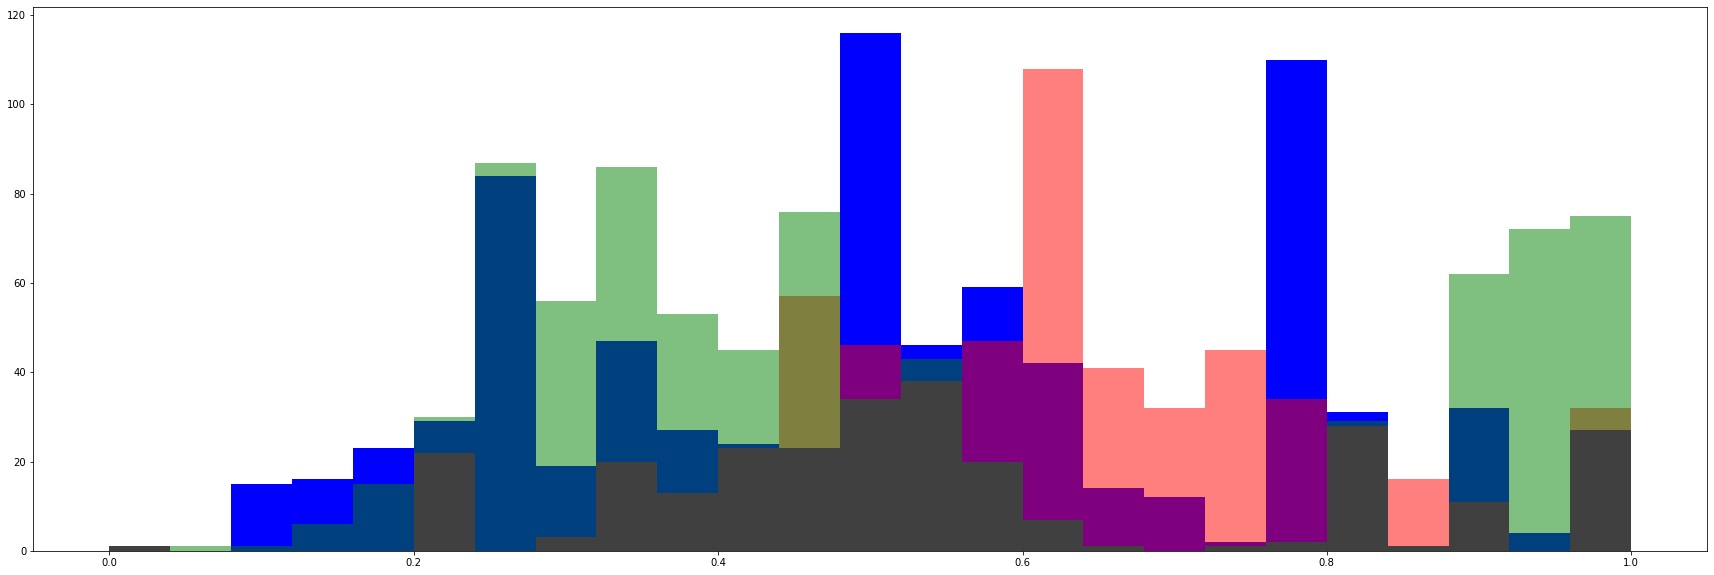

In [22]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_pos"], color="blue", bins=25
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_neg"],
    color="red",
    alpha=0.5,
    bins=25,
)
ax.hist(
    hr_merged_df_normal["videoTitleSentimentScore_vader_com"],
    color="green",
    alpha=0.5,
    bins=25,
)

Text(0.5, 1.0, 'Video Title Neg/Pos')

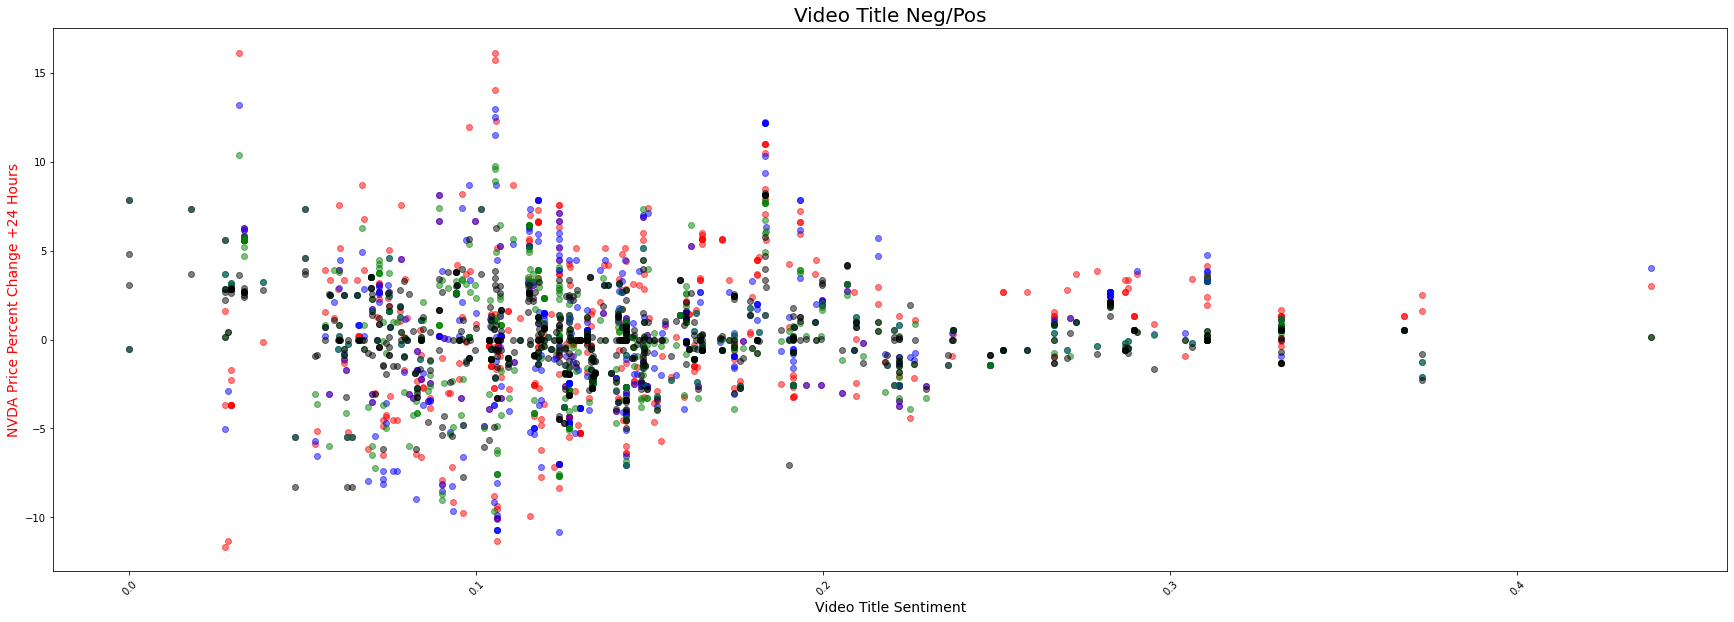

In [21]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(
    (
        hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_com"]
    ),
    hr_merged_df_normal.percent_change_96,
    color="red",
    marker="o",
    alpha=0.5,
)

ax.scatter(
    (
        hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_com"]
    ),
    hr_merged_df_normal.percent_change_72,
    color="blue",
    marker="o",
    alpha=0.5,
)

ax.scatter(
    (
        hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_com"]
    ),
    hr_merged_df_normal.percent_change_48,
    color="green",
    marker="o",
    alpha=0.5,
)

ax.scatter(
    (
        hr_merged_df_normal["videoTitleSentimentScore_vader_pos"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_neg"]
        * hr_merged_df_normal["videoTitleSentimentScore_vader_com"]
    ),
    hr_merged_df_normal.percent_change_24,
    color="black",
    marker="o",
    alpha=0.5,
)

# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Video Title Neg/Pos", fontsize=20)

Text(0.5, 1.0, 'Video Title Neg/Pos')

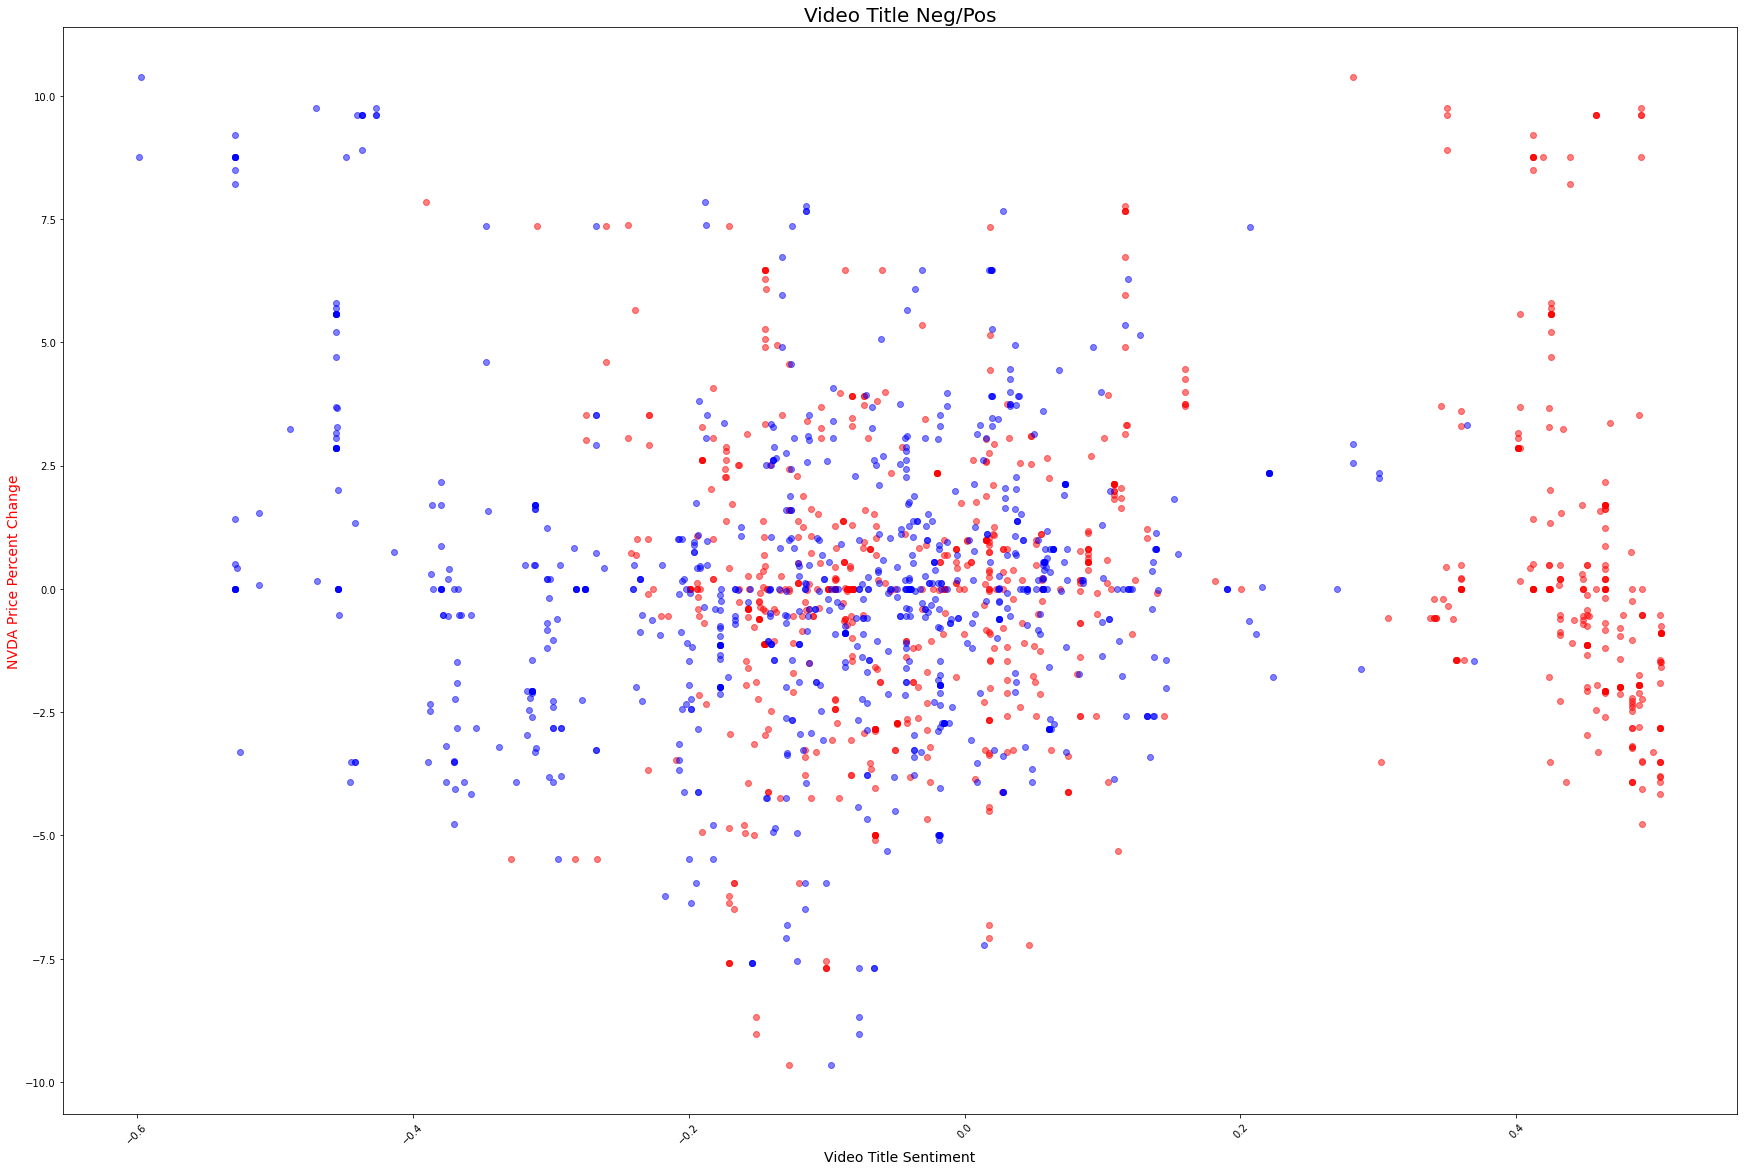

In [38]:
# 'caption_list_split_by_nvidia_10words_flairscores',
# 'caption_list_split_by_nvidia_20words_flairscores',
# 'caption_list_split_by_nvidia_35words_flairscores',
# 'caption_list_split_by_nvidia_10words_vaderscores',
# 'caption_list_split_by_nvidia_20words_vaderscores',
# 'caption_list_split_by_nvidia_35words_vaderscores',

fig, ax = plt.subplots(figsize=(30, 20))

ax.scatter(
    (hr_merged_df_normal["videoTitleSentimentScore_vader_com"]),
    hr_merged_df_normal.percent_change_48,
    color="red",
    marker="o",
    alpha=0.5,
)

ax.scatter(
    (hr_merged_df_normal["falir_videoTitle_score"]),
    hr_merged_df_normal.percent_change_48,
    color="blue",
    marker="o",
    alpha=0.5,
)


# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change", color="red", fontsize=14)
plt.title("Video Title Neg/Pos", fontsize=20)

Text(0.5, 1.0, 'Video Title Pos Only')

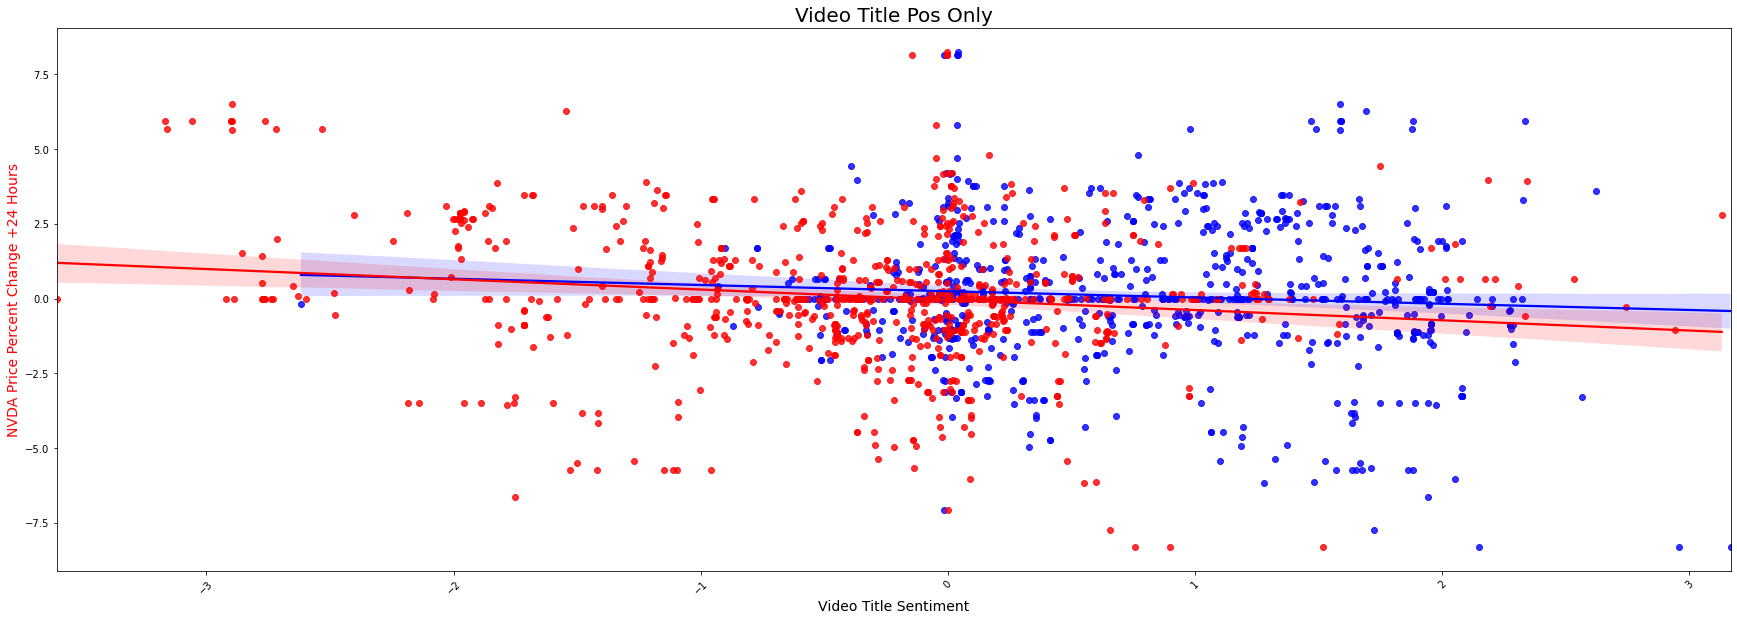

In [41]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 10))

# ax.scatter(
#     (hr_merged_df_normal["videoTitleSentimentScore_vader_com"]),
#     hr_merged_df_normal.percent_change_24,
#     color="red",
#     marker="o",
# )

sns.regplot(
    x=hr_merged_df_scaled["videoTitleSentimentScore_vader_com"]
    * hr_merged_df_scaled["weighted_like_dislike_ratio"],
    y=hr_merged_df_scaled.percent_change_24,
    fit_reg=True,
    color="blue",
)

sns.regplot(
    x=hr_merged_df_scaled["falir_videoTitle_score"]
    * hr_merged_df_scaled["weighted_like_dislike_ratio"],
    y=hr_merged_df_scaled.percent_change_24,
    fit_reg=True,
    color="red",
)

# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Video Title Pos Only", fontsize=20)

# 'viewCount', 'likeCount', 'dislikeCount',
#        'num_days_since_pub', 'viewcounts_weighted', 'like_count_weighted',
#        'dislike_count_weighted', 'like_dislike_ratio',
#        'weighted_like_dislike_ratio',
#        'like_dislike_ratio_by_viewcounts_weighted'

Text(0.5, 1.0, 'Caption Neg/Pos')

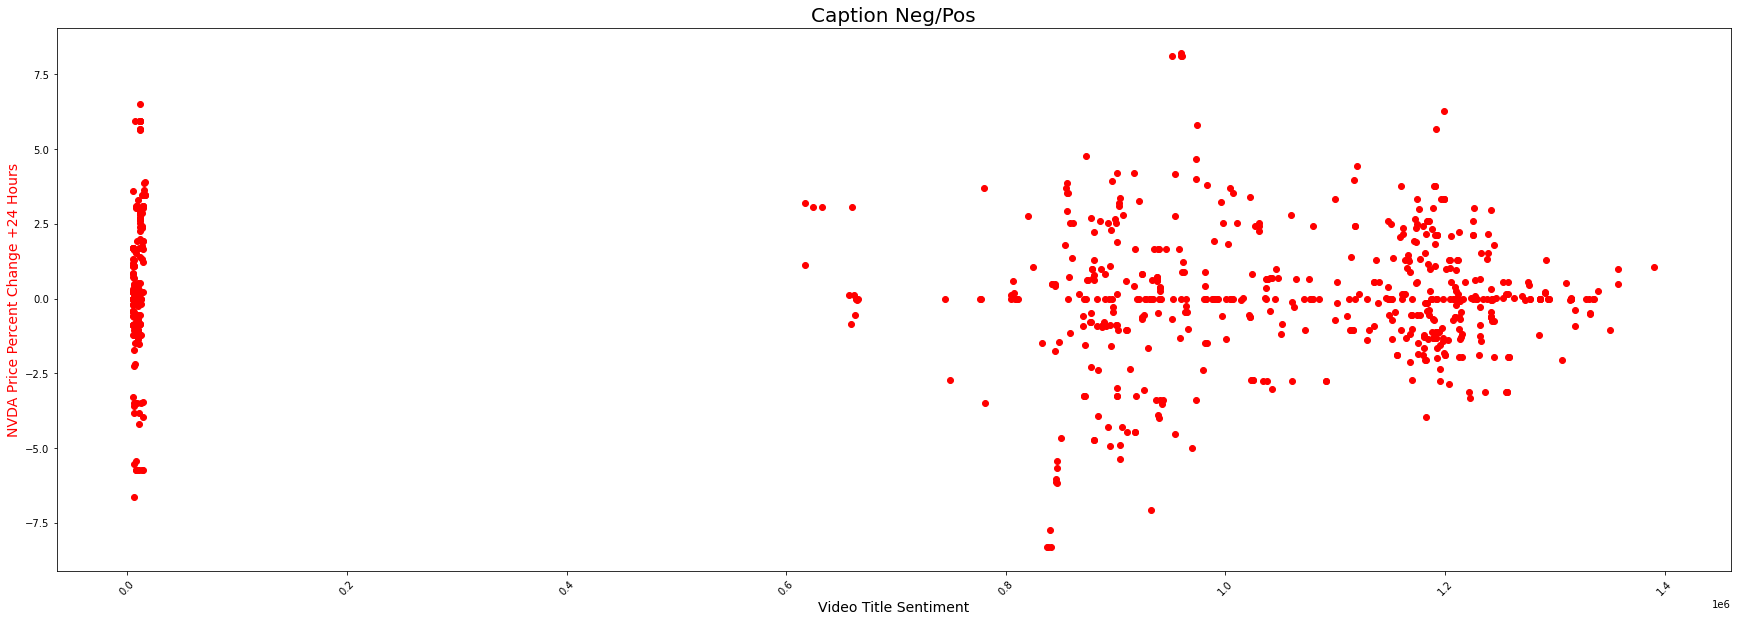

In [111]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.scatter(
    hr_merged_df_non_scaled["viewCount"],
    hr_merged_df_non_scaled["percent_change_24"],
    color="red",
    marker="o",
)
# set x-axis label
ax.set_xlabel("Video Title Sentiment", fontsize=14)
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
plt.title("Caption Neg/Pos", fontsize=20)

In [83]:
hr_merged_df_normal

,Unnamed: 0,viewCount,likeCount,dislikeCount,num_days_since_pub,viewcounts_weighted,like_count_weighted,dislike_count_weighted,like_dislike_ratio,weighted_like_dislike_ratio,...,caption_list_split_by_nvidia_20words_vaderscores,caption_list_split_by_nvidia_35words_vaderscores,Time,weekday,price,percent_change_24,percent_change_48,percent_change_72,percent_change_96,product_videosent
0,0,1.000000,1.000000,1.000000,0.103116,0.680324,0.517210,0.764437,0.924363,0.924363,...,0.000000,0.210464,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,0.247190
1,1,0.549737,0.578787,0.594001,0.092890,0.417243,0.325562,0.496561,0.838936,0.838936,...,0.049330,0.115768,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.144169
2,2,0.595948,0.634468,0.661524,0.109137,0.315061,0.259327,0.457250,0.781887,0.781887,...,0.212499,0.229164,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.306448
3,3,0.614283,0.660345,0.690521,0.118471,0.319809,0.262472,0.464198,0.714035,0.714035,...,0.160854,0.164435,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.298044
4,4,0.614614,0.660834,0.691078,0.118772,0.321493,0.264972,0.467953,0.783524,0.783524,...,0.186676,0.152927,2020-10-02,4.0,522.47998,0.0,0.0,4.444195,5.144696,0.360829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,800,0.530558,0.698167,0.604075,0.910281,0.080260,0.106841,0.127043,0.486589,0.486589,...,0.643195,0.814603,2021-04-01,3.0,552.72998,0.0,0.0,0.000000,1.226644,0.591117
801,801,0.442650,0.609847,0.515022,0.843143,0.114739,0.139801,0.169870,0.363833,0.363833,...,0.768614,0.885678,2021-04-02,4.0,552.72998,0.0,0.0,0.000000,1.226644,0.434907
802,802,0.528137,0.694805,0.604498,0.892518,0.118358,0.140473,0.133288,0.467916,0.467916,...,0.703767,0.825791,2021-04-02,4.0,552.72998,0.0,0.0,0.000000,1.226644,0.506945
803,803,0.524242,0.689939,0.603496,0.900045,0.092322,0.104821,0.112318,0.424249,0.424249,...,0.703767,0.825791,2021-04-02,4.0,552.72998,0.0,0.0,0.810530,0.938976,0.543849


In [ ]:
columns_to_plot = [
    "viewCount",
    "likeCount",
    "dislikeCount",
    "num_days_since_pub",
    "viewcounts_weighted",
    "like_count_weighted",
    "dislike_count_weighted",
    "like_dislike_ratio",
    "weighted_like_dislike_ratio",
    "like_dislike_ratio_by_viewcounts_weighted",
    "videoTitleSentimentScore_vader_pos",
    "videoTitleSentimentScore_vader_neg",
    "videoTitleSentimentScore_vader_com",
    "captionSentimentScore_vader_pos",
    "captionSentimentScore_vader_neg",
    "captionSentimentScore_vader_com",
    "caption_list_split_by_nvidia_10words_flairscores",
    "caption_list_split_by_nvidia_20words_flairscores",
    "caption_list_split_by_nvidia_35words_flairscores",
    "caption_list_split_by_nvidia_10words_vaderscores",
    "caption_list_split_by_nvidia_20words_vaderscores",
    "caption_list_split_by_nvidia_35words_vaderscores",
]

for x in columns_to_plot:
    fig, ax = plt.subplots(figsize=(15, 10))

    sns.regplot(
        x=hr_merged_df_normal[x],
        y=hr_merged_df_normal.percent_change_24,
        fit_reg=True,
        color="blue",
    )

    # set x-axis label
    ax.set_xlabel(x, fontsize=14)
    plt.xticks(rotation=45)
    # set y-axis label
    ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)

#### NON SCALED EDA

In [90]:
hr_merged_df_non_scaled.columns

Index(['Unnamed: 0', 'viewCount', 'likeCount', 'dislikeCount',
       'num_days_since_pub', 'viewcounts_weighted', 'like_count_weighted',
       'dislike_count_weighted', 'like_dislike_ratio',
       'weighted_like_dislike_ratio',
       'like_dislike_ratio_by_viewcounts_weighted',
       'videoTitleSentimentScore_vader_pos',
       'videoTitleSentimentScore_vader_neg',
       'videoTitleSentimentScore_vader_com', 'captionSentimentScore_vader_pos',
       'captionSentimentScore_vader_neg', 'captionSentimentScore_vader_com',
       'falir_videoTitle_score',
       'caption_list_split_by_nvidia_10words_flairscores',
       'caption_list_split_by_nvidia_20words_flairscores',
       'caption_list_split_by_nvidia_35words_flairscores',
       'caption_list_split_by_nvidia_10words_vaderscores',
       'caption_list_split_by_nvidia_20words_vaderscores',
       'caption_list_split_by_nvidia_35words_vaderscores', 'Time', 'weekday',
       'price', 'percent_change_24', 'percent_change_48', 'perce

In [ ]:
hr_merged_df_non_scaled[hr_merged_df_non_scaled["viewCount"] > 0.4]["viewCount"]

Text(0, 0.5, 'NVDA Price Percent Change +24 Hours')

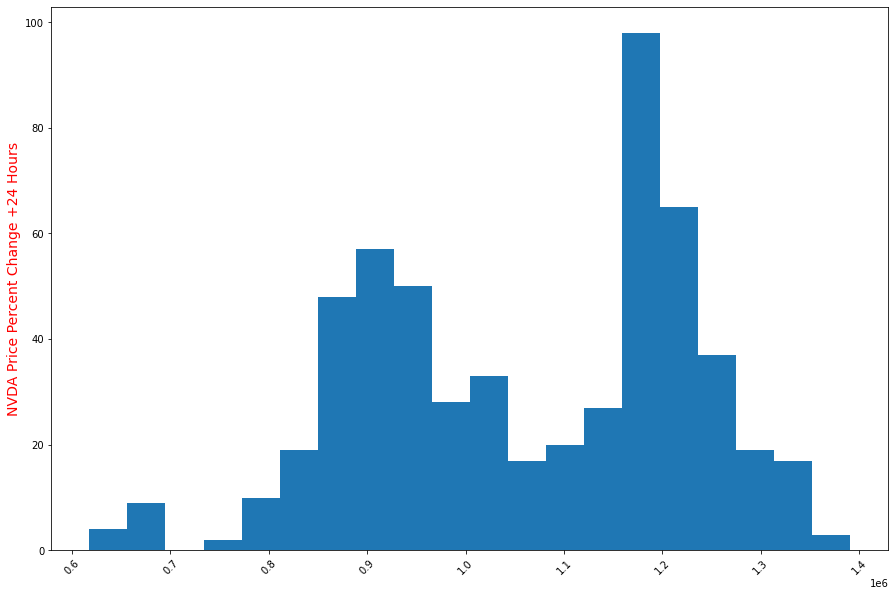

In [107]:
fig, ax = plt.subplots(figsize=(15, 10))

x = hr_merged_df_non_scaled[hr_merged_df_non_scaled["viewCount"] > 20000]["viewCount"]

plt.hist(
    x,
    bins=20,
)

# set x-axis label
plt.xticks(rotation=45)
# set y-axis label
ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)

C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-112-b4603d387343>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 10))


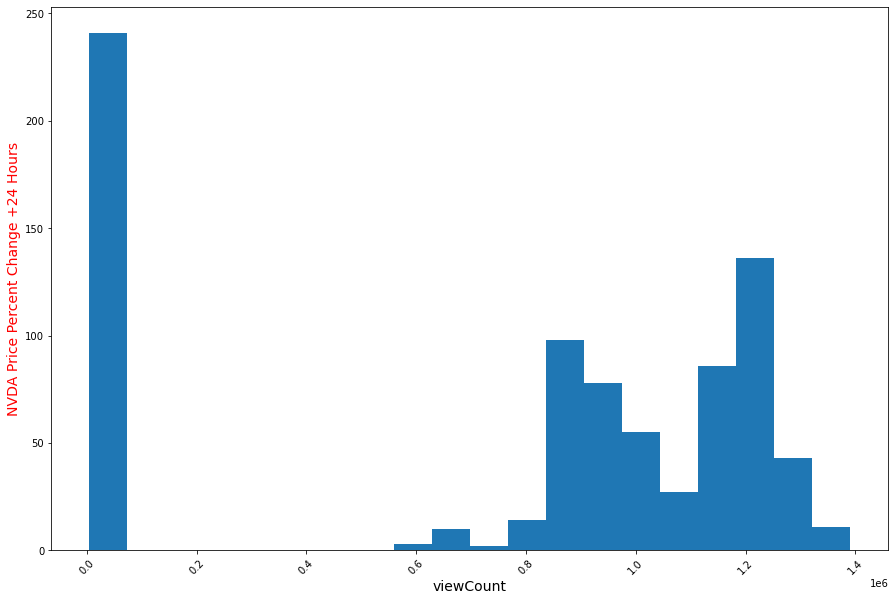

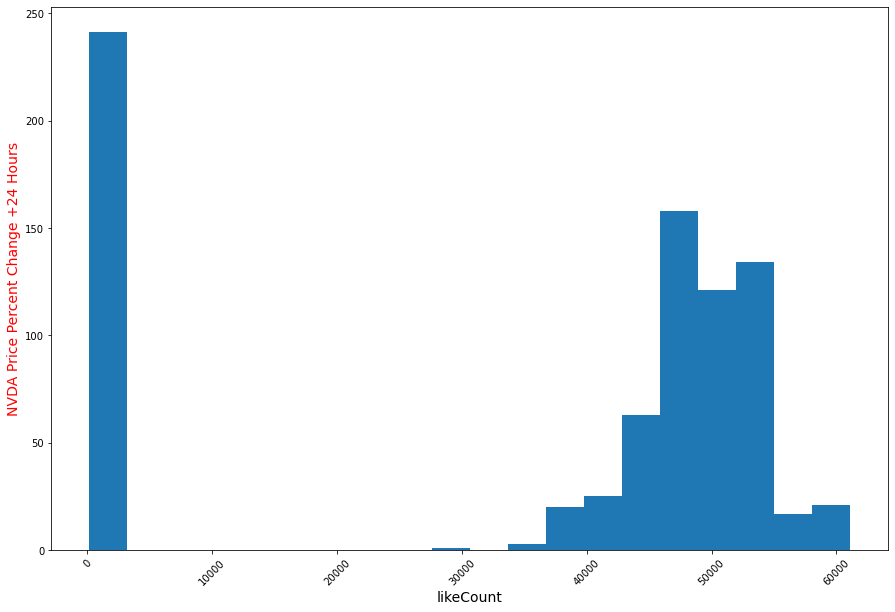

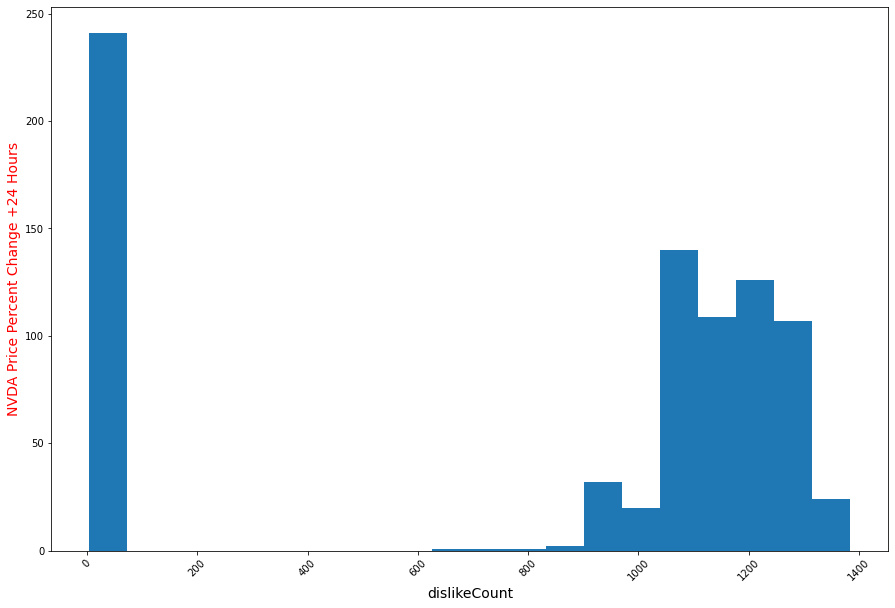

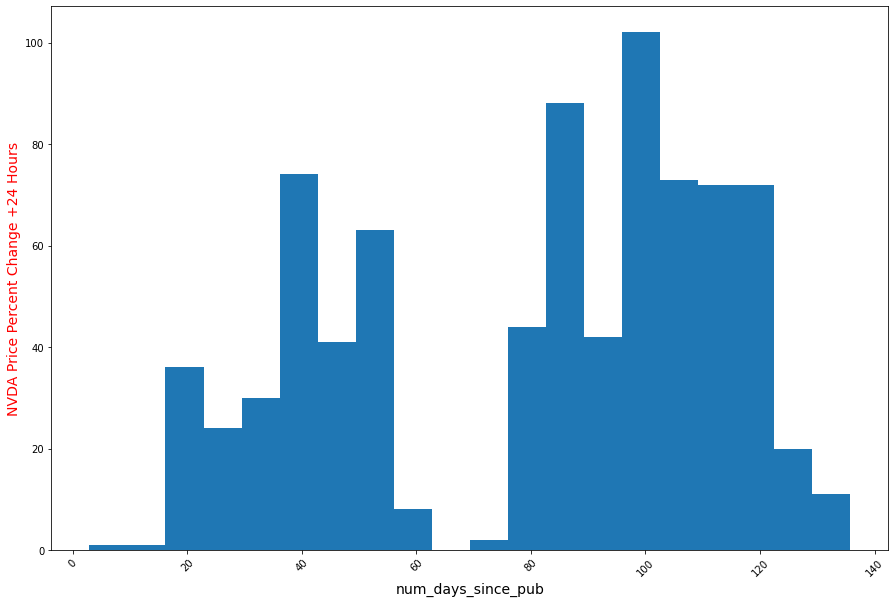

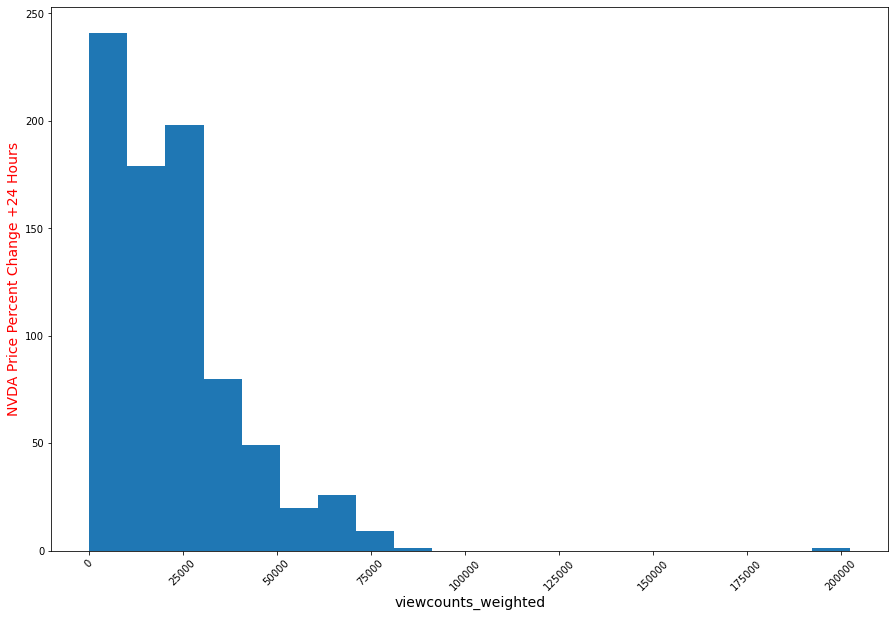

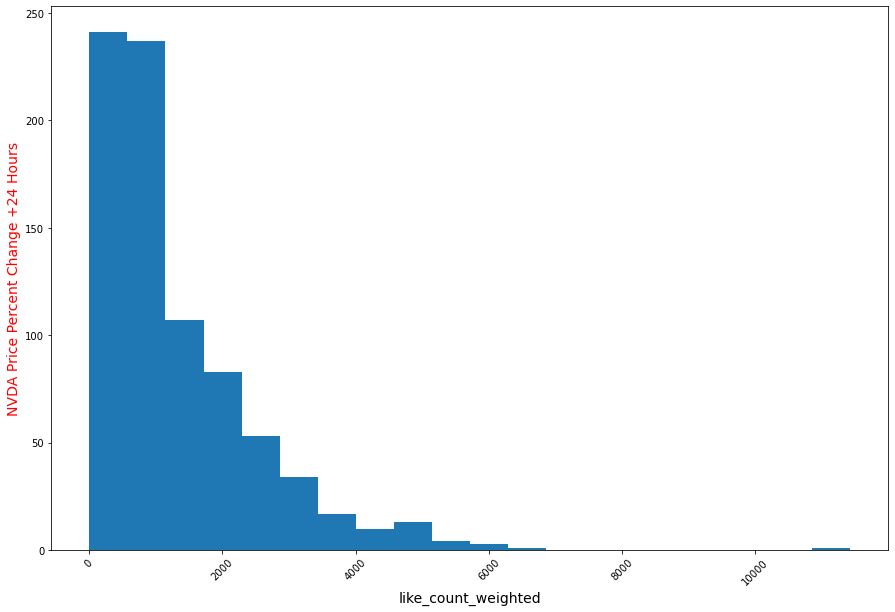

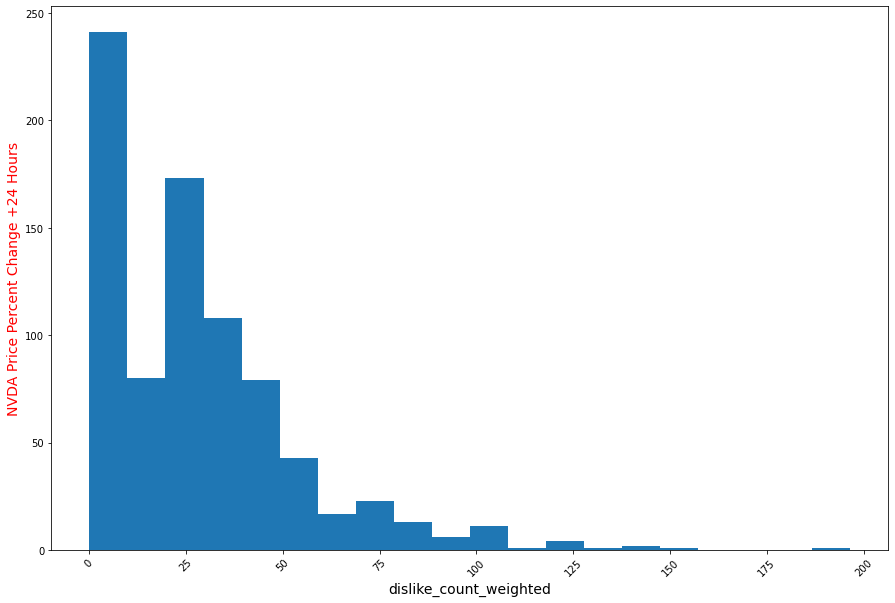

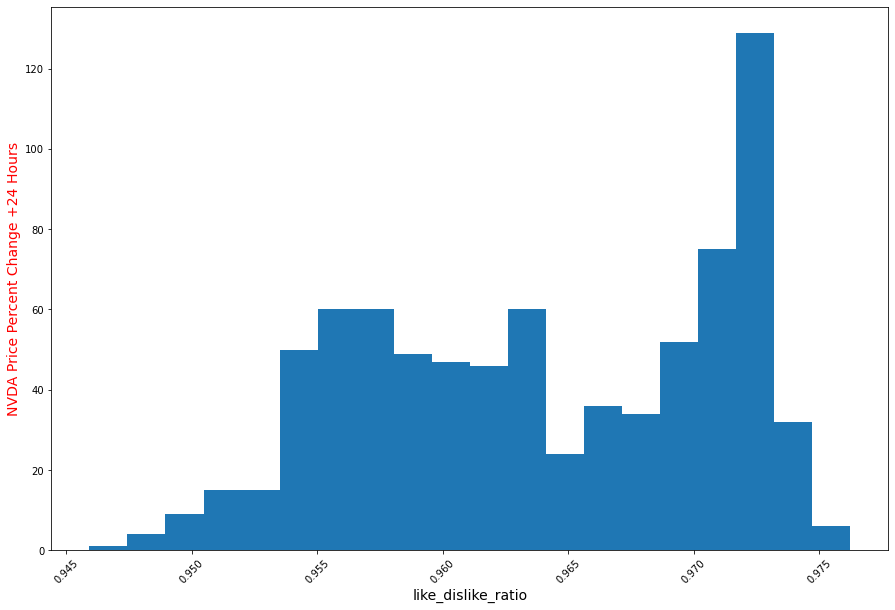

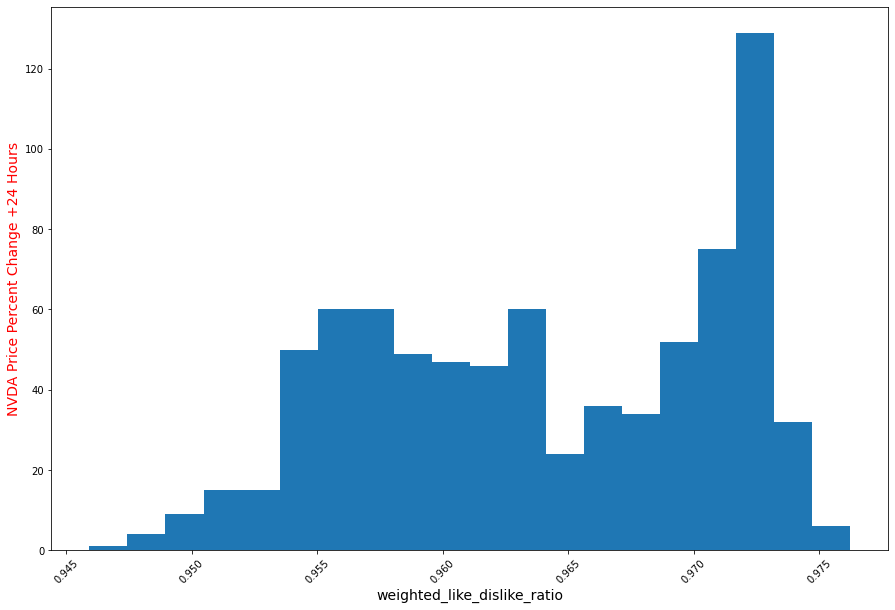

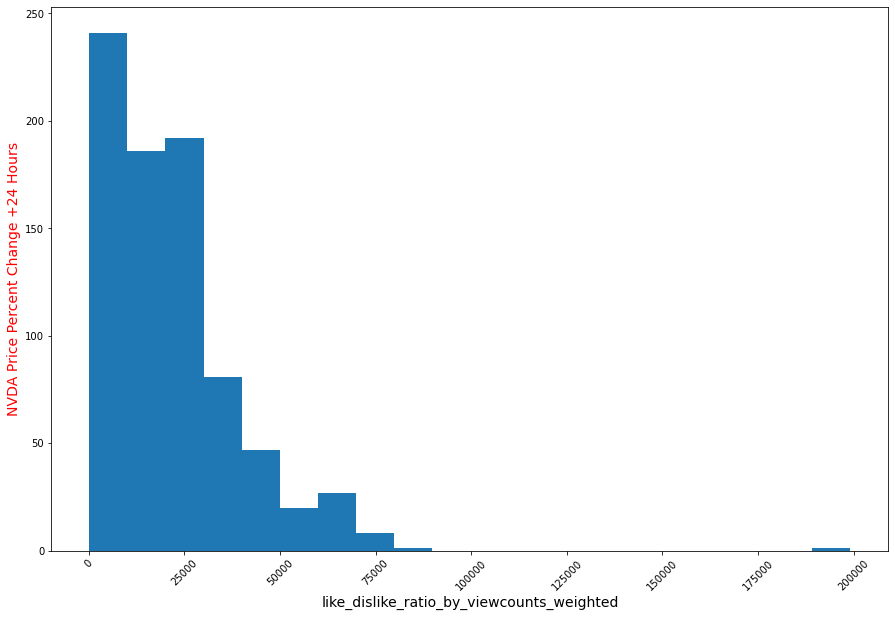

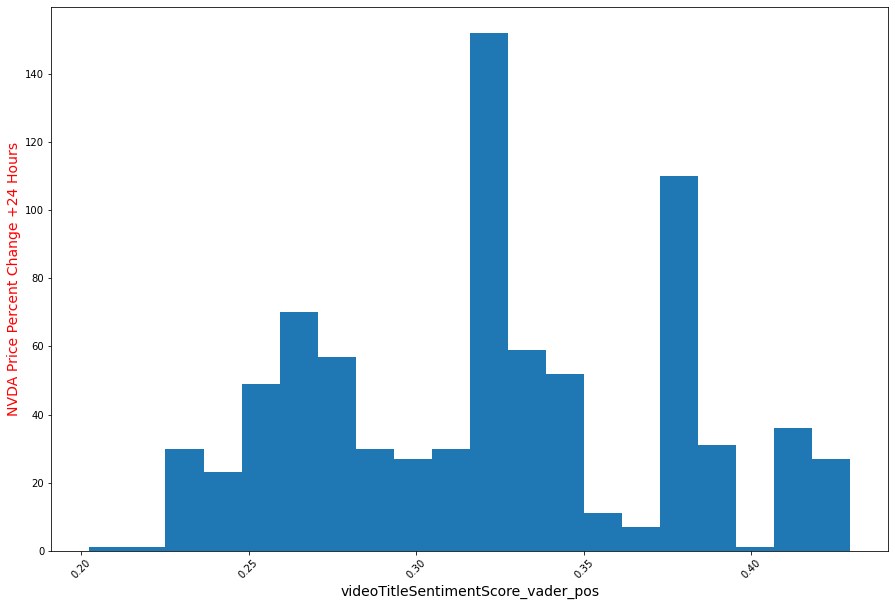

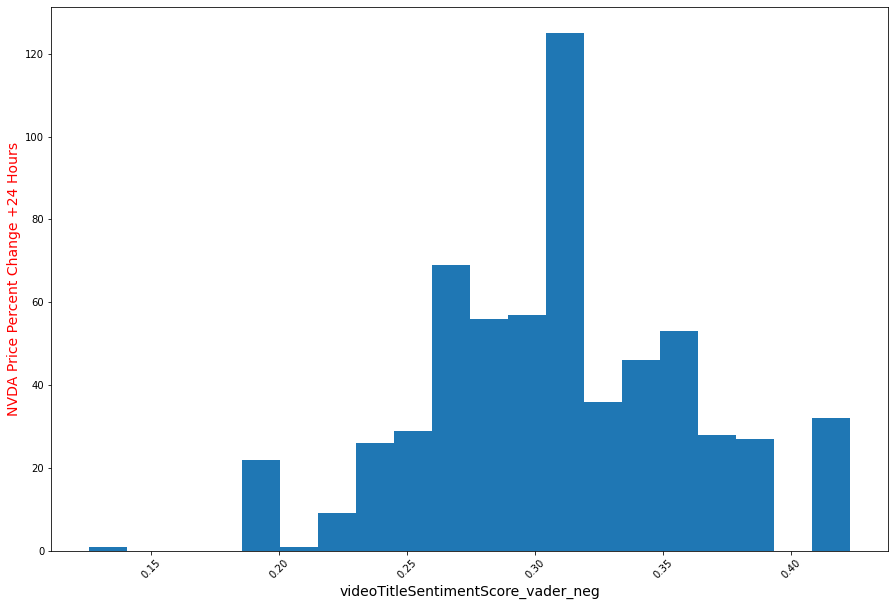

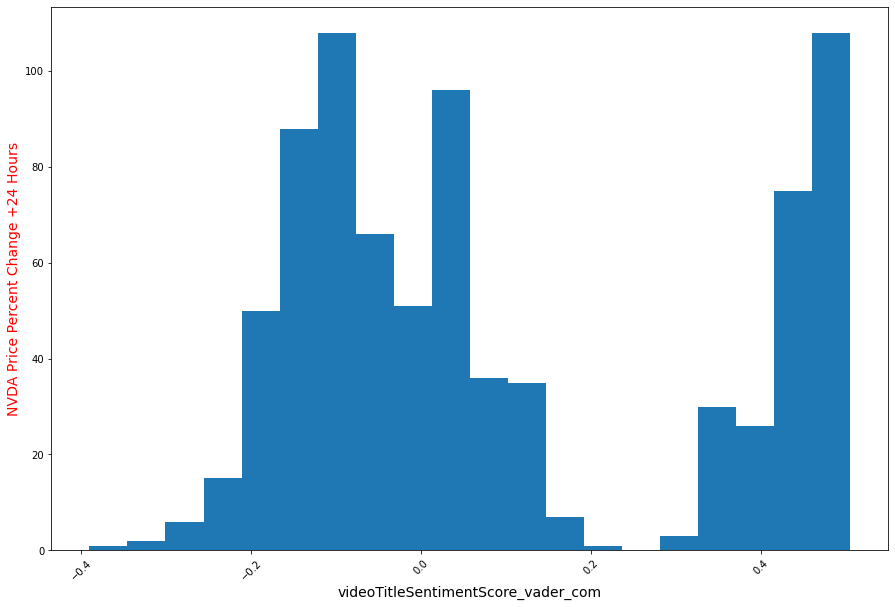

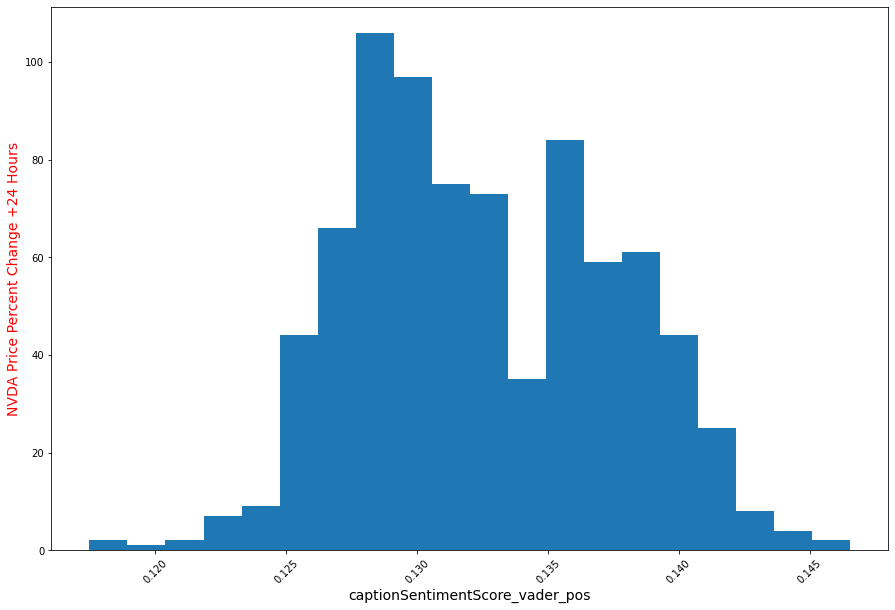

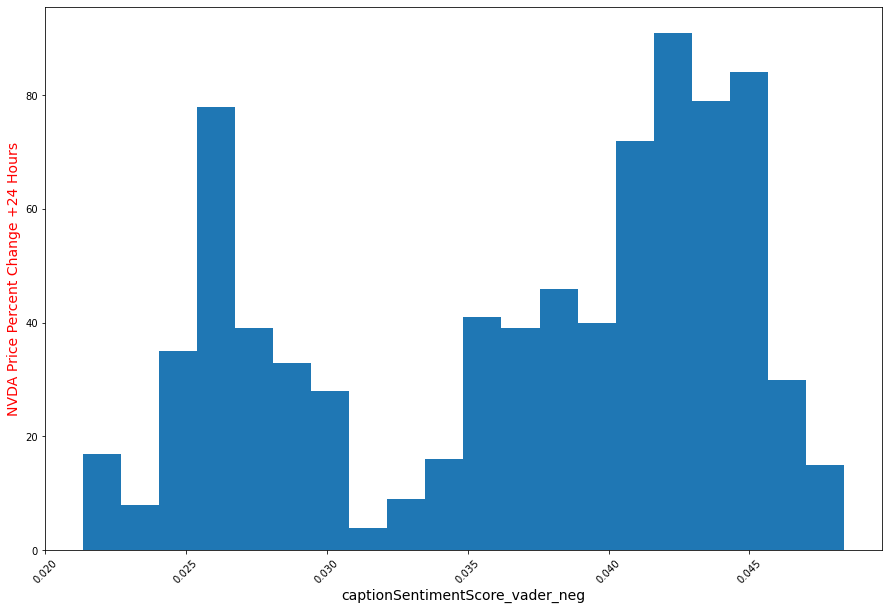

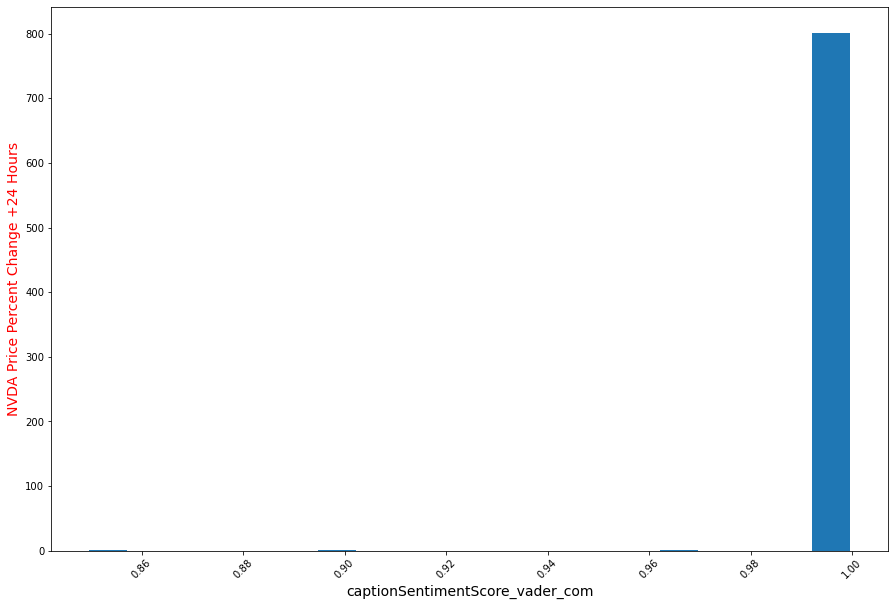

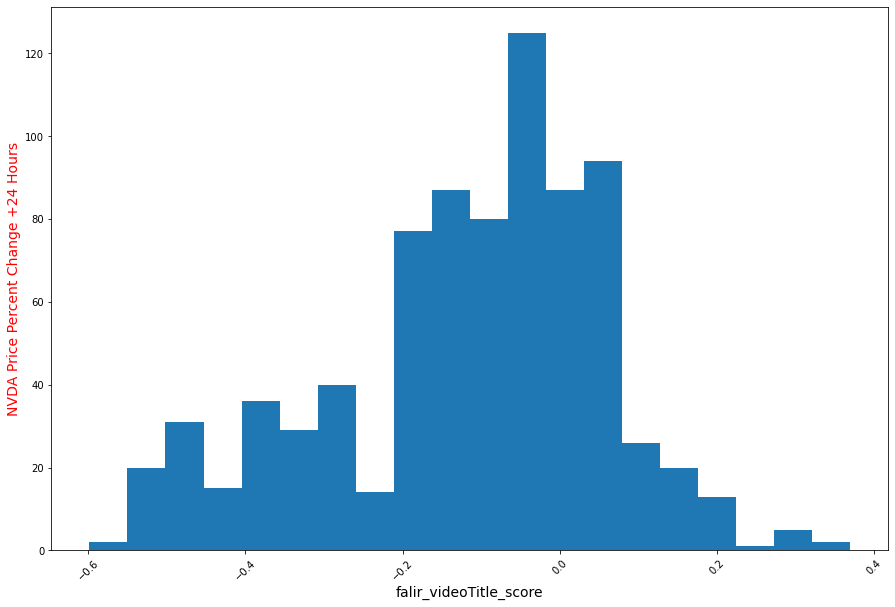

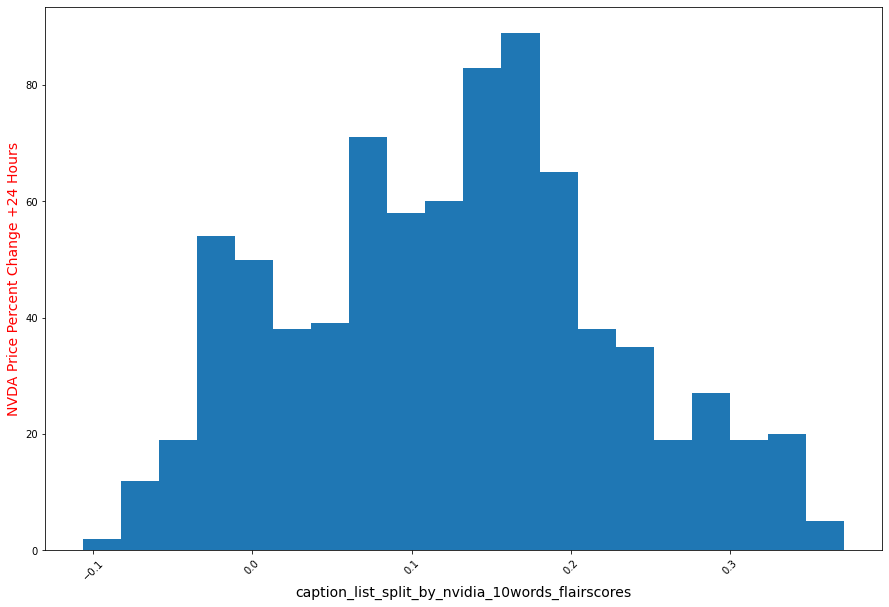

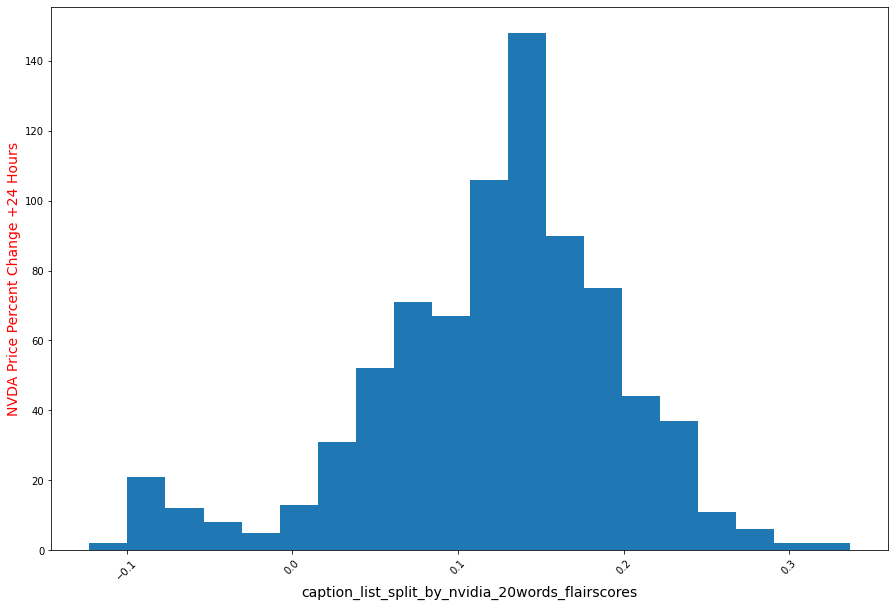

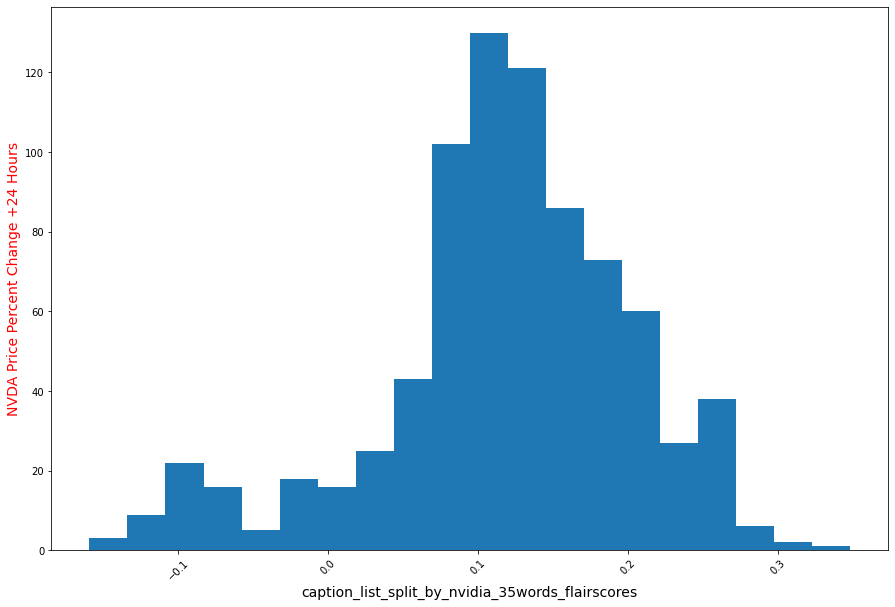

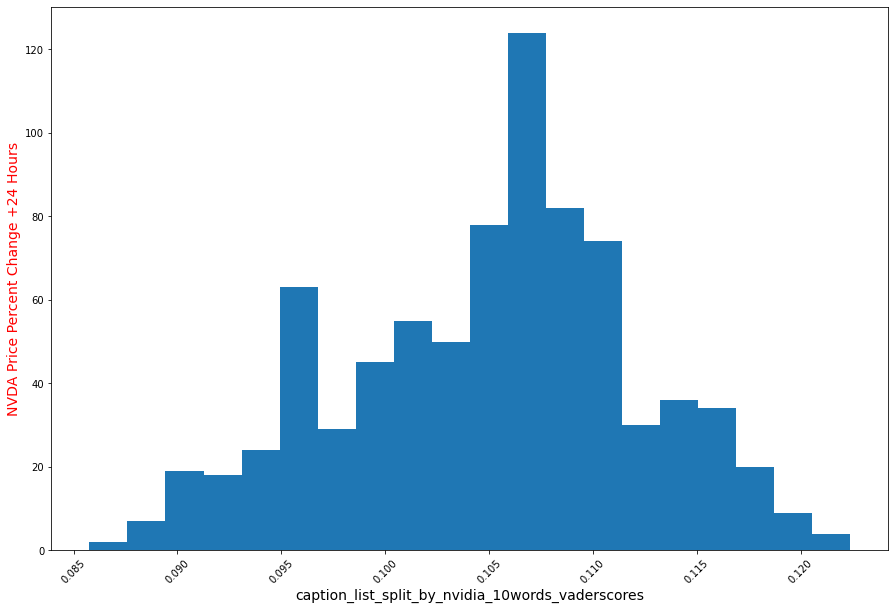

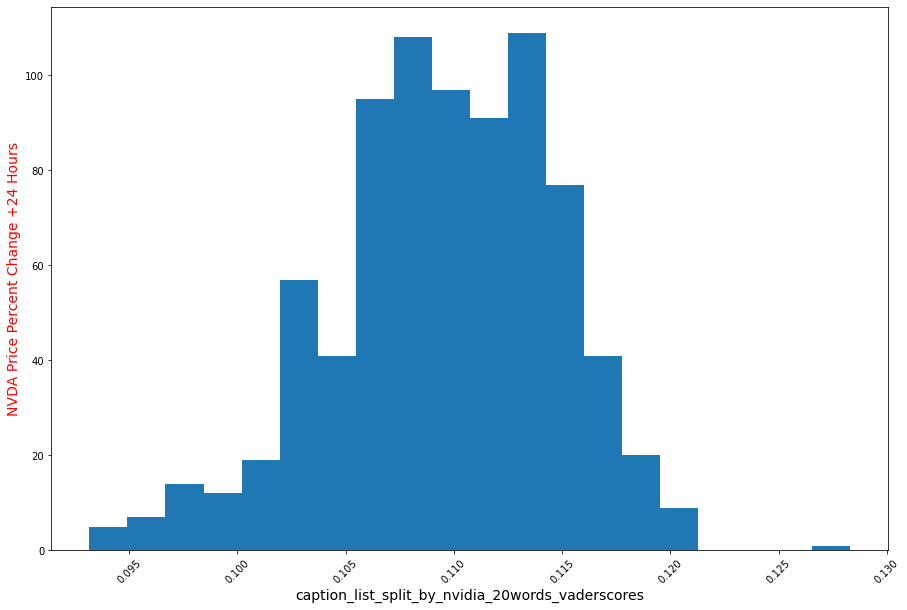

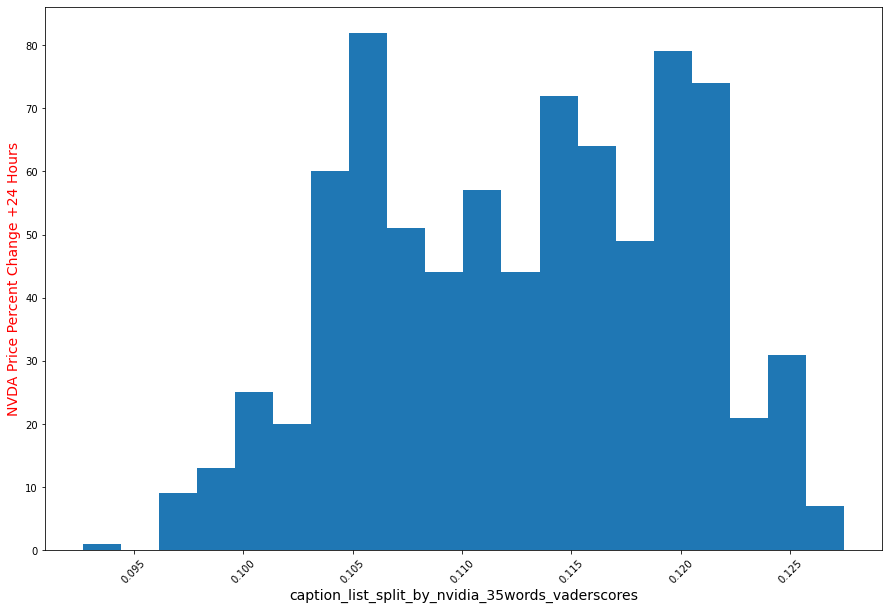

In [112]:
columns_to_plot = [
    "viewCount",
    "likeCount",
    "dislikeCount",
    "num_days_since_pub",
    "viewcounts_weighted",
    "like_count_weighted",
    "dislike_count_weighted",
    "like_dislike_ratio",
    "weighted_like_dislike_ratio",
    "like_dislike_ratio_by_viewcounts_weighted",
    "videoTitleSentimentScore_vader_pos",
    "videoTitleSentimentScore_vader_neg",
    "videoTitleSentimentScore_vader_com",
    "captionSentimentScore_vader_pos",
    "captionSentimentScore_vader_neg",
    "captionSentimentScore_vader_com",
    "falir_videoTitle_score",
    "caption_list_split_by_nvidia_10words_flairscores",
    "caption_list_split_by_nvidia_20words_flairscores",
    "caption_list_split_by_nvidia_35words_flairscores",
    "caption_list_split_by_nvidia_10words_vaderscores",
    "caption_list_split_by_nvidia_20words_vaderscores",
    "caption_list_split_by_nvidia_35words_vaderscores",
]

for x in columns_to_plot:
    fig, ax = plt.subplots(figsize=(15, 10))

    plt.hist(hr_merged_df_non_scaled[x], bins=20)

    # set x-axis label
    ax.set_xlabel(x, fontsize=14)
    plt.xticks(rotation=45)
    # set y-axis label
    ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)

In [26]:
hr_merged_df["viewCount"]

0      9.644912e+05
1      1.045160e+06
2      1.077168e+06
3      1.077747e+06
4      1.080107e+06
           ...     
799    9.310103e+05
800    7.775514e+05
801    9.267848e+05
802    9.199844e+05
803    9.211634e+05
Name: viewCount, Length: 804, dtype: float64

C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Chris\AppData\Roaming\Python\Python38\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-35-6d388e6c7b06>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(30, 15))


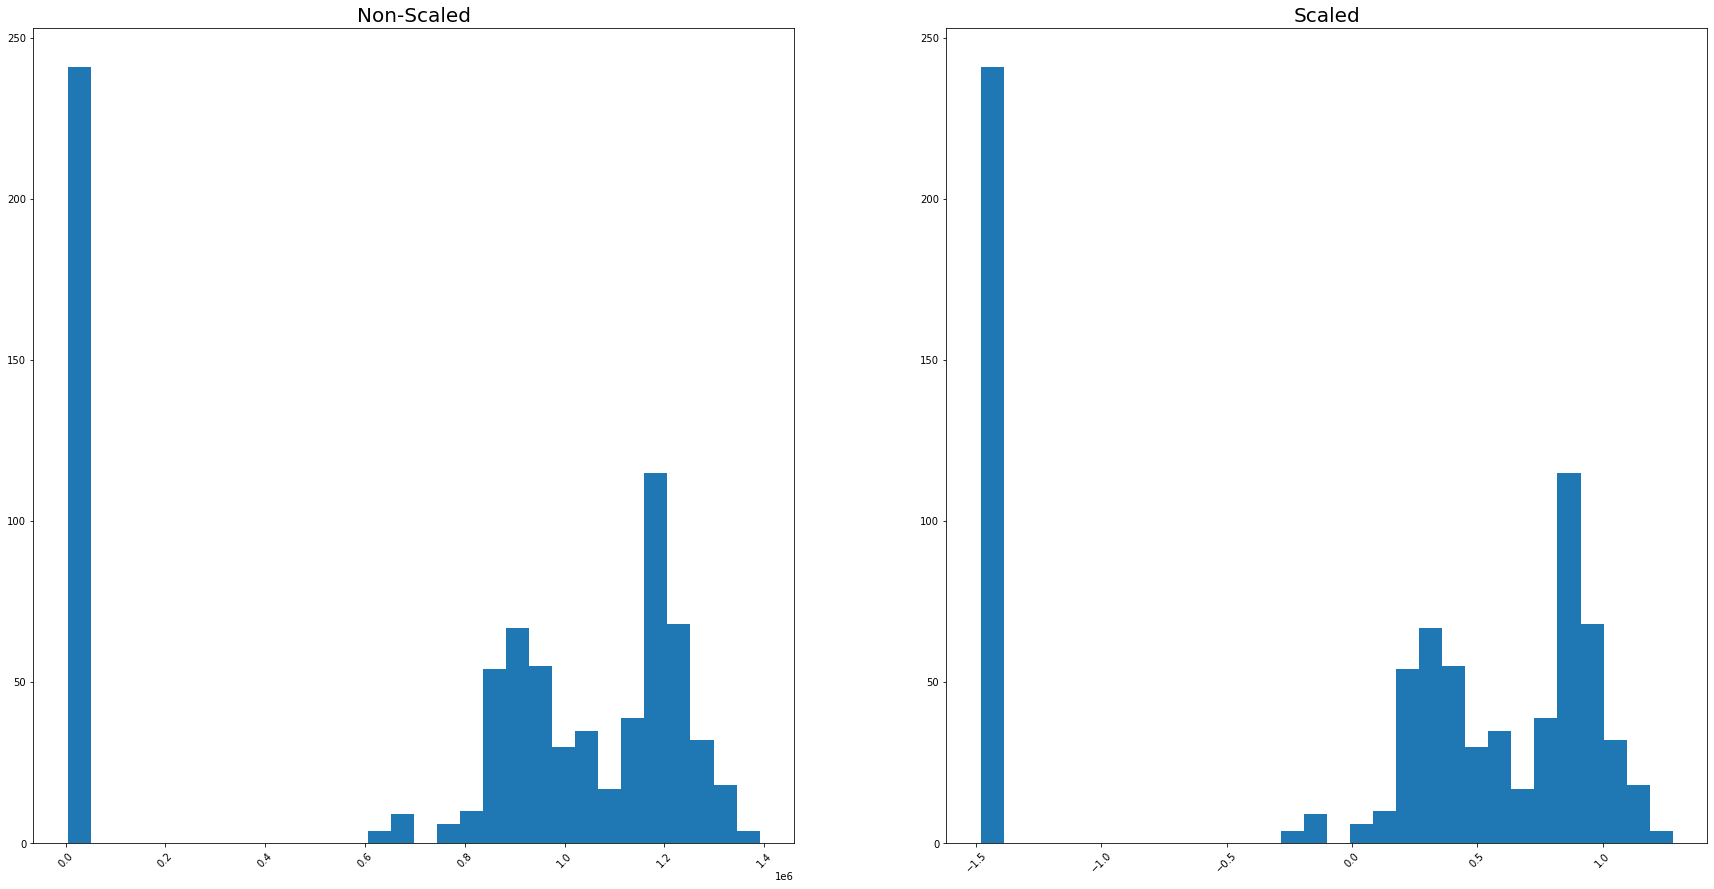

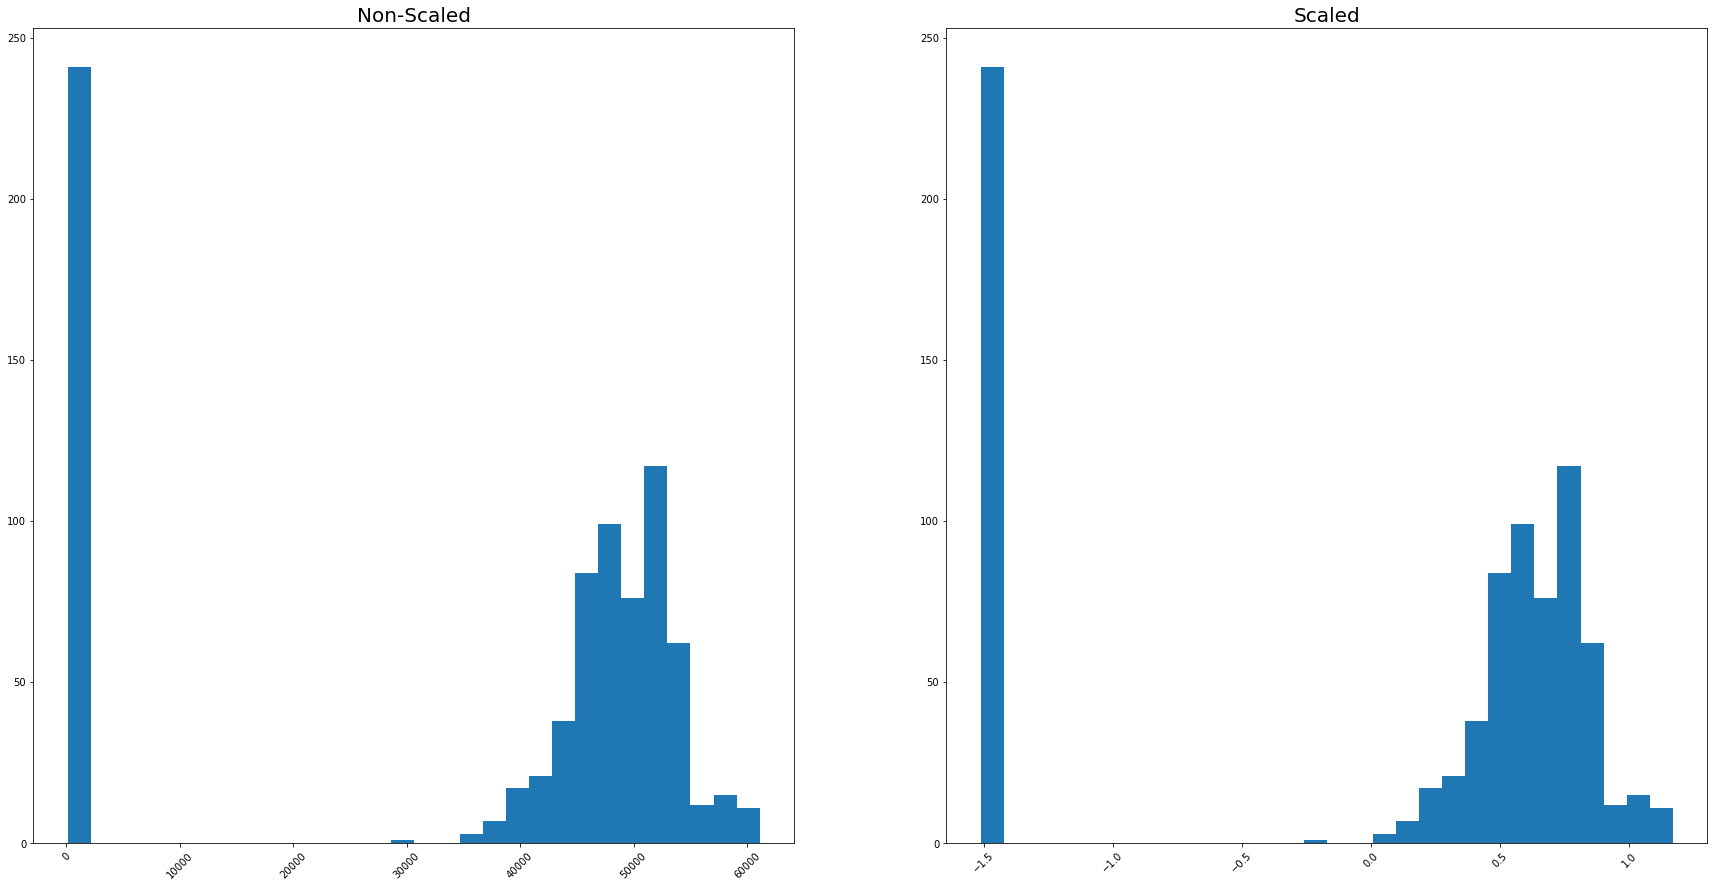

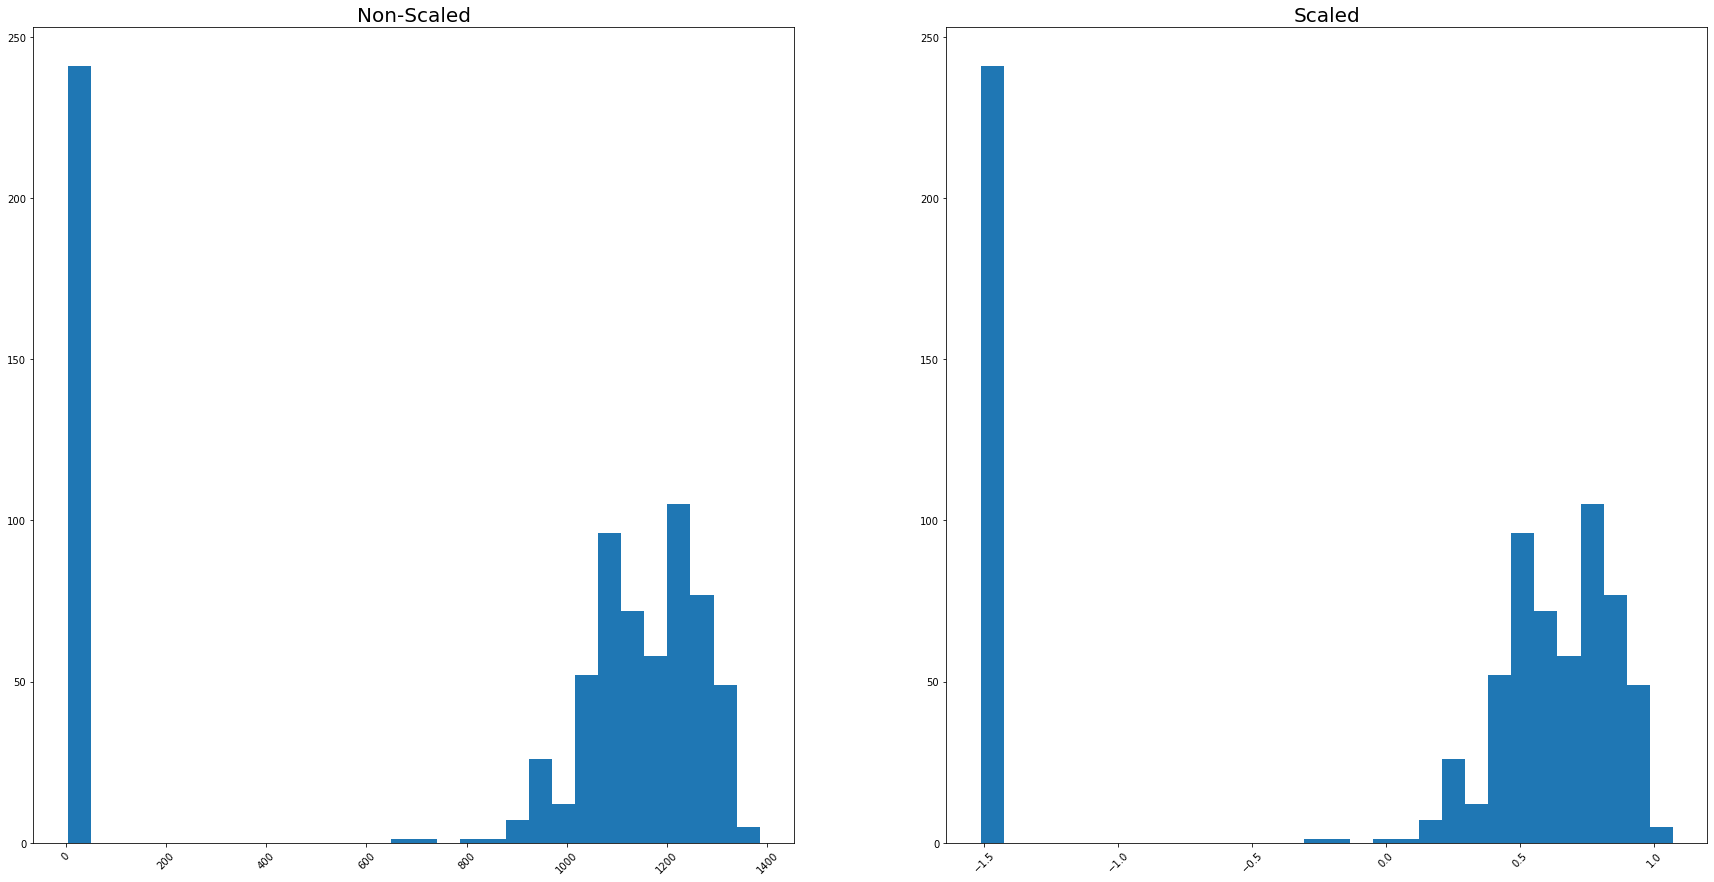

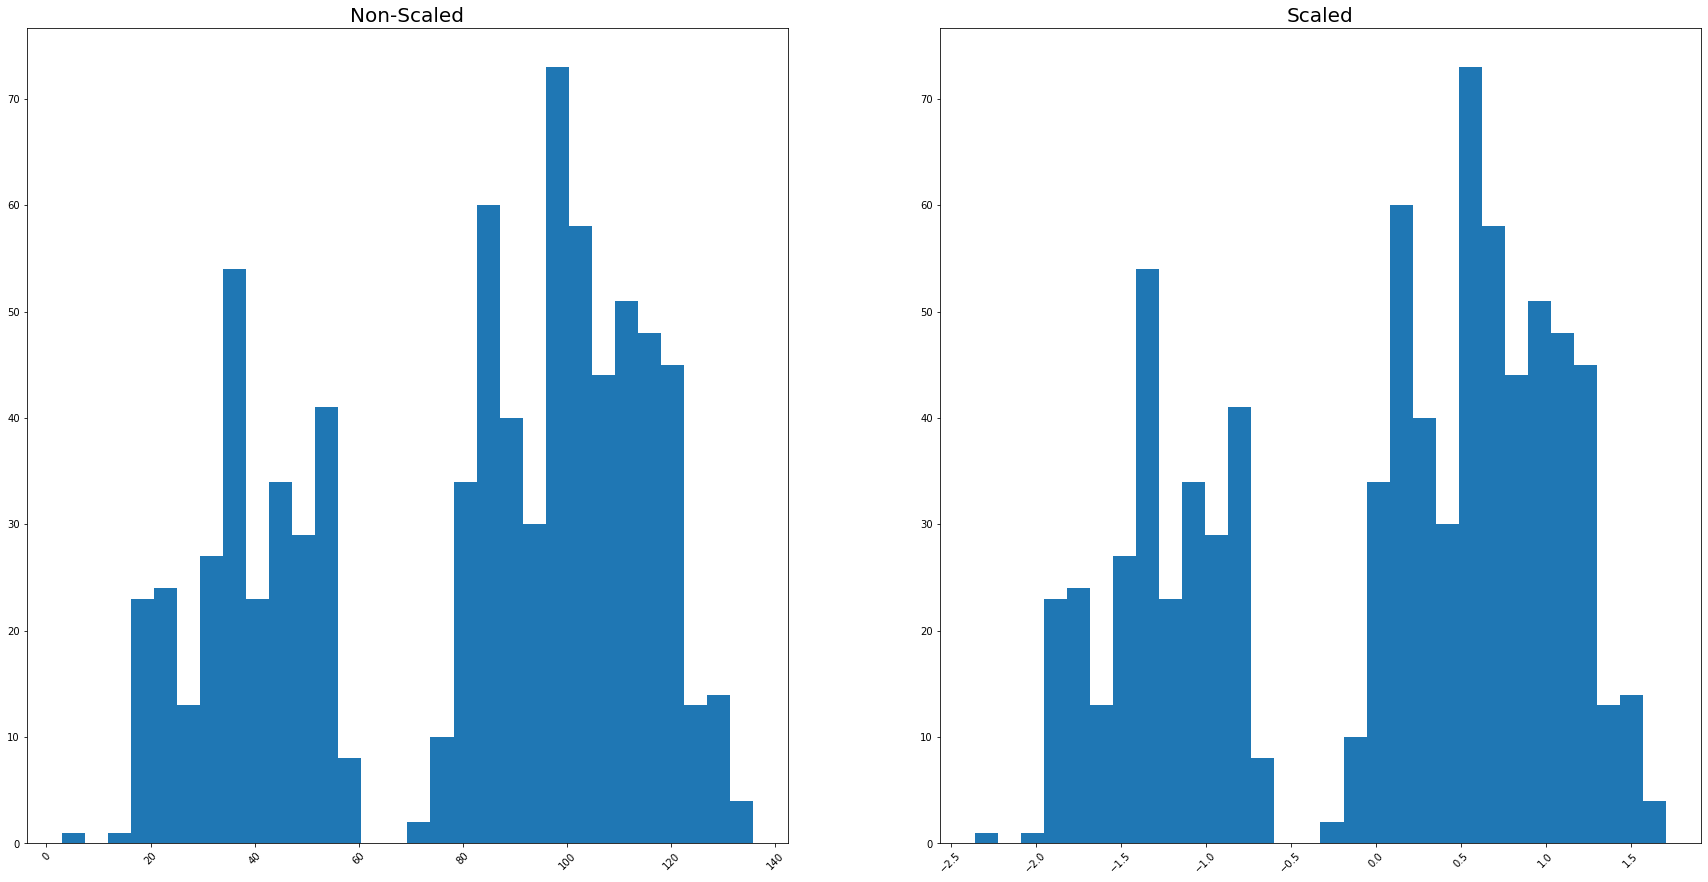

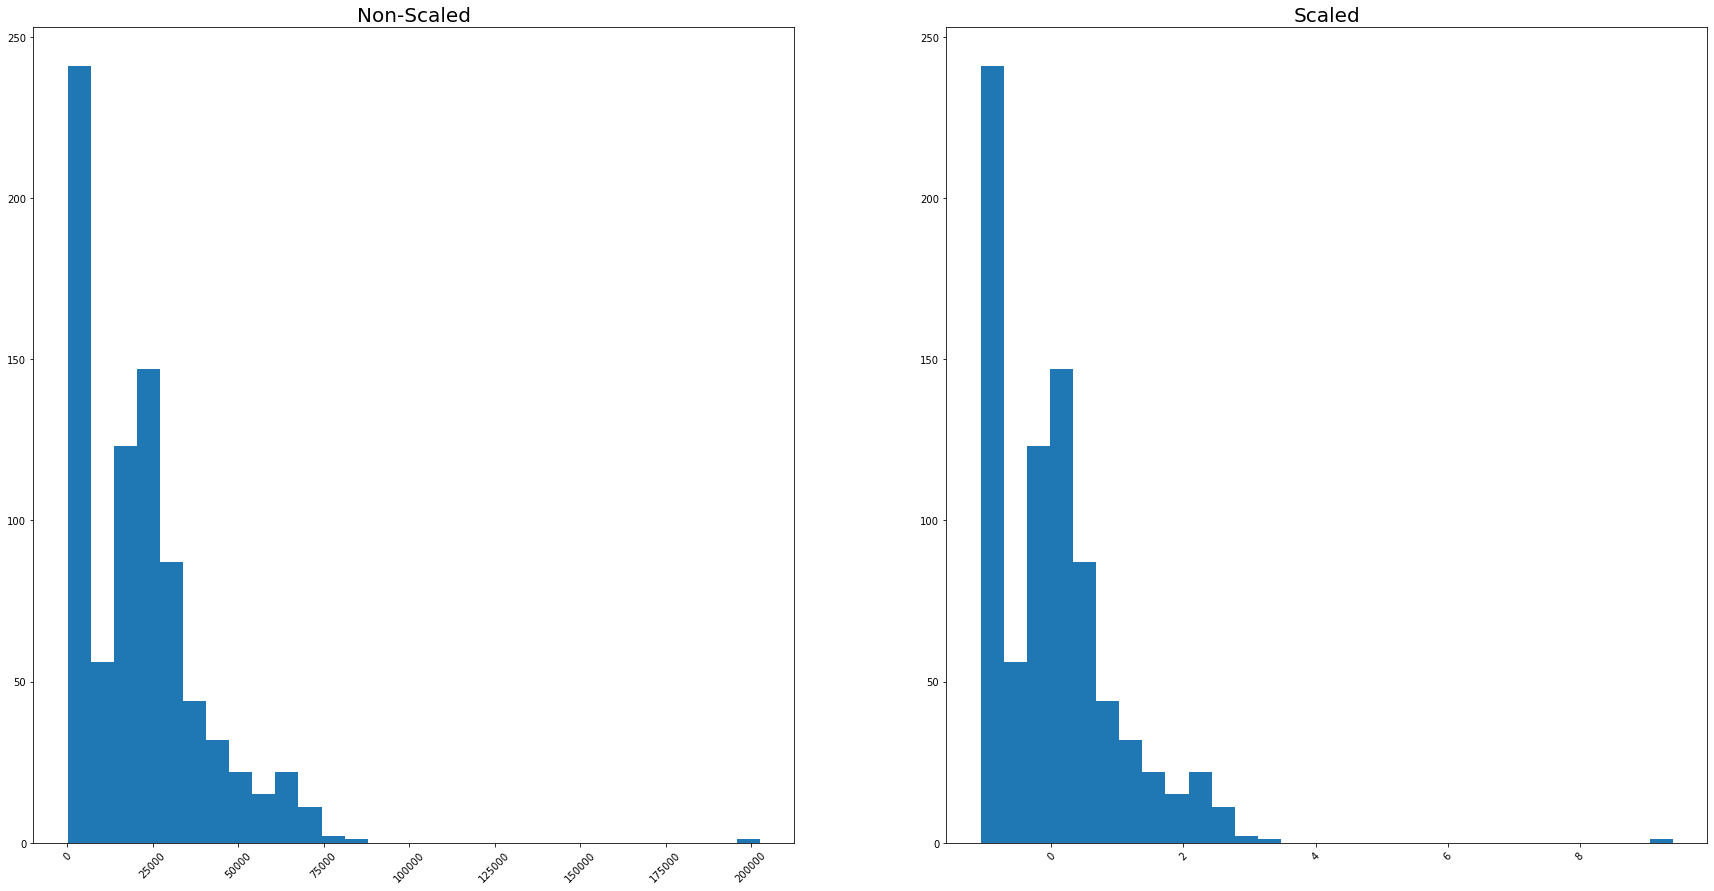

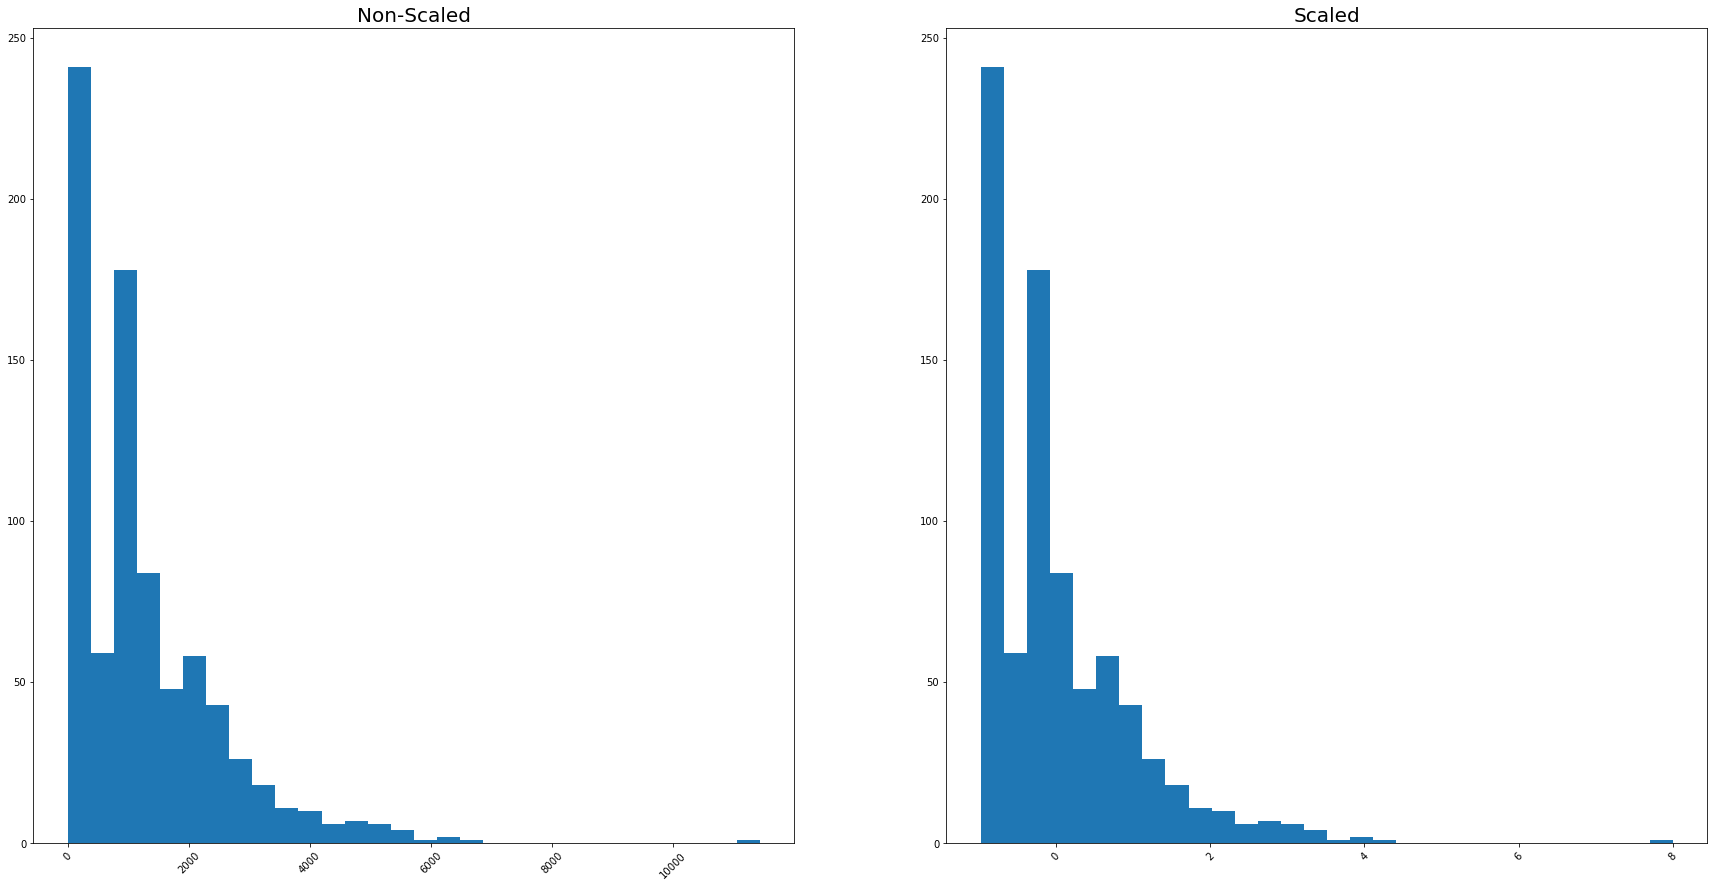

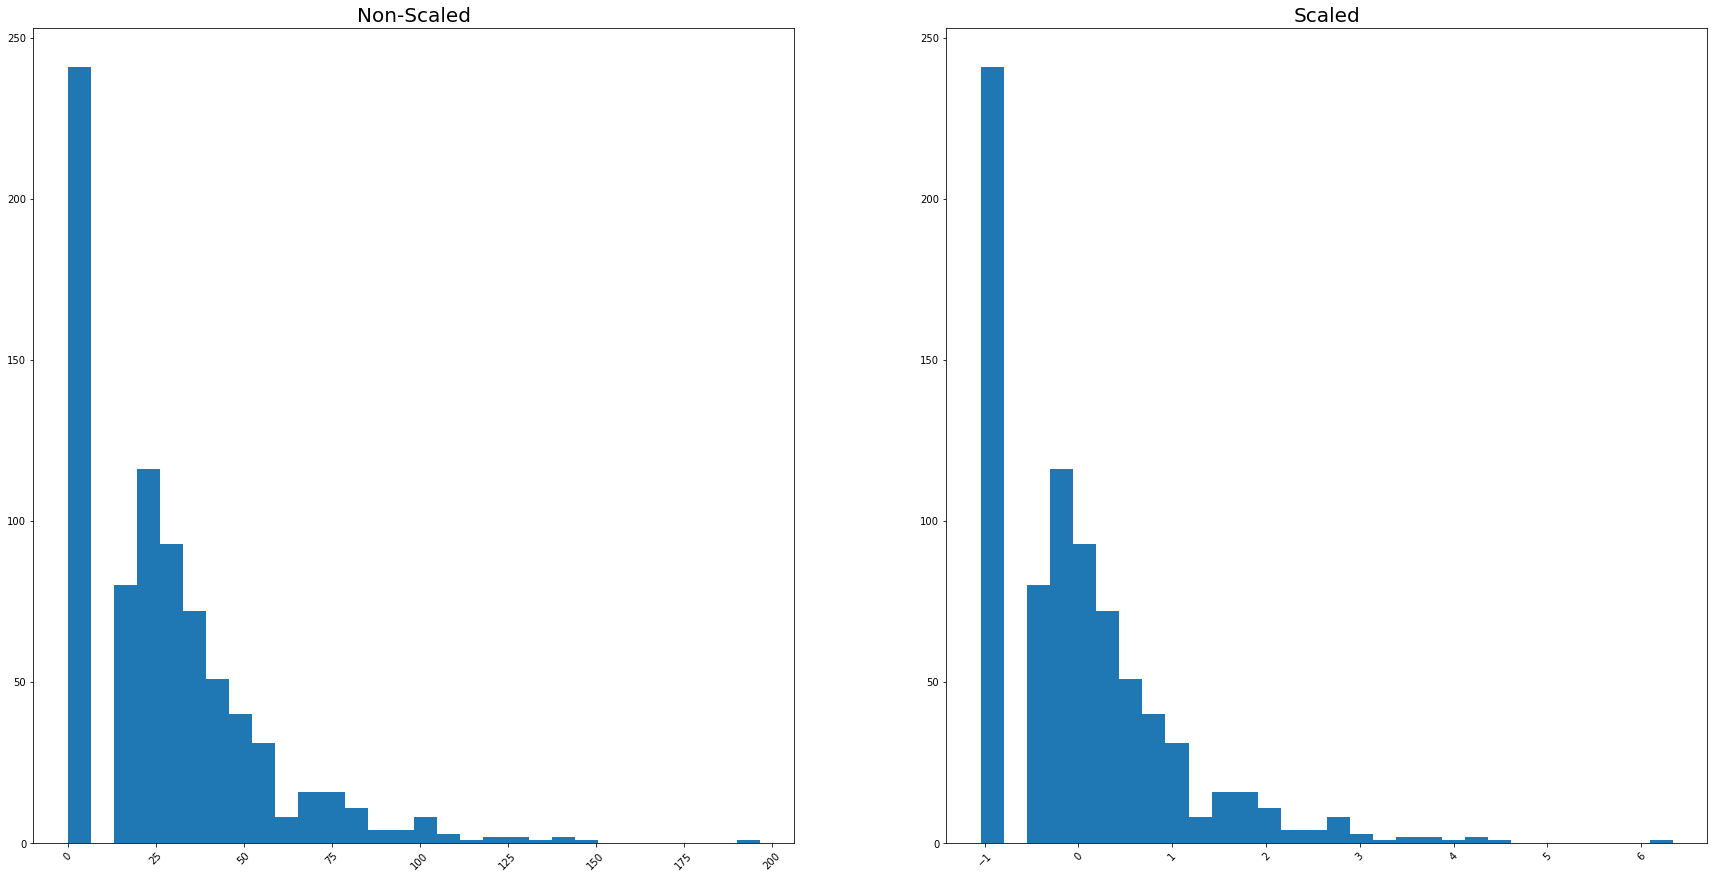

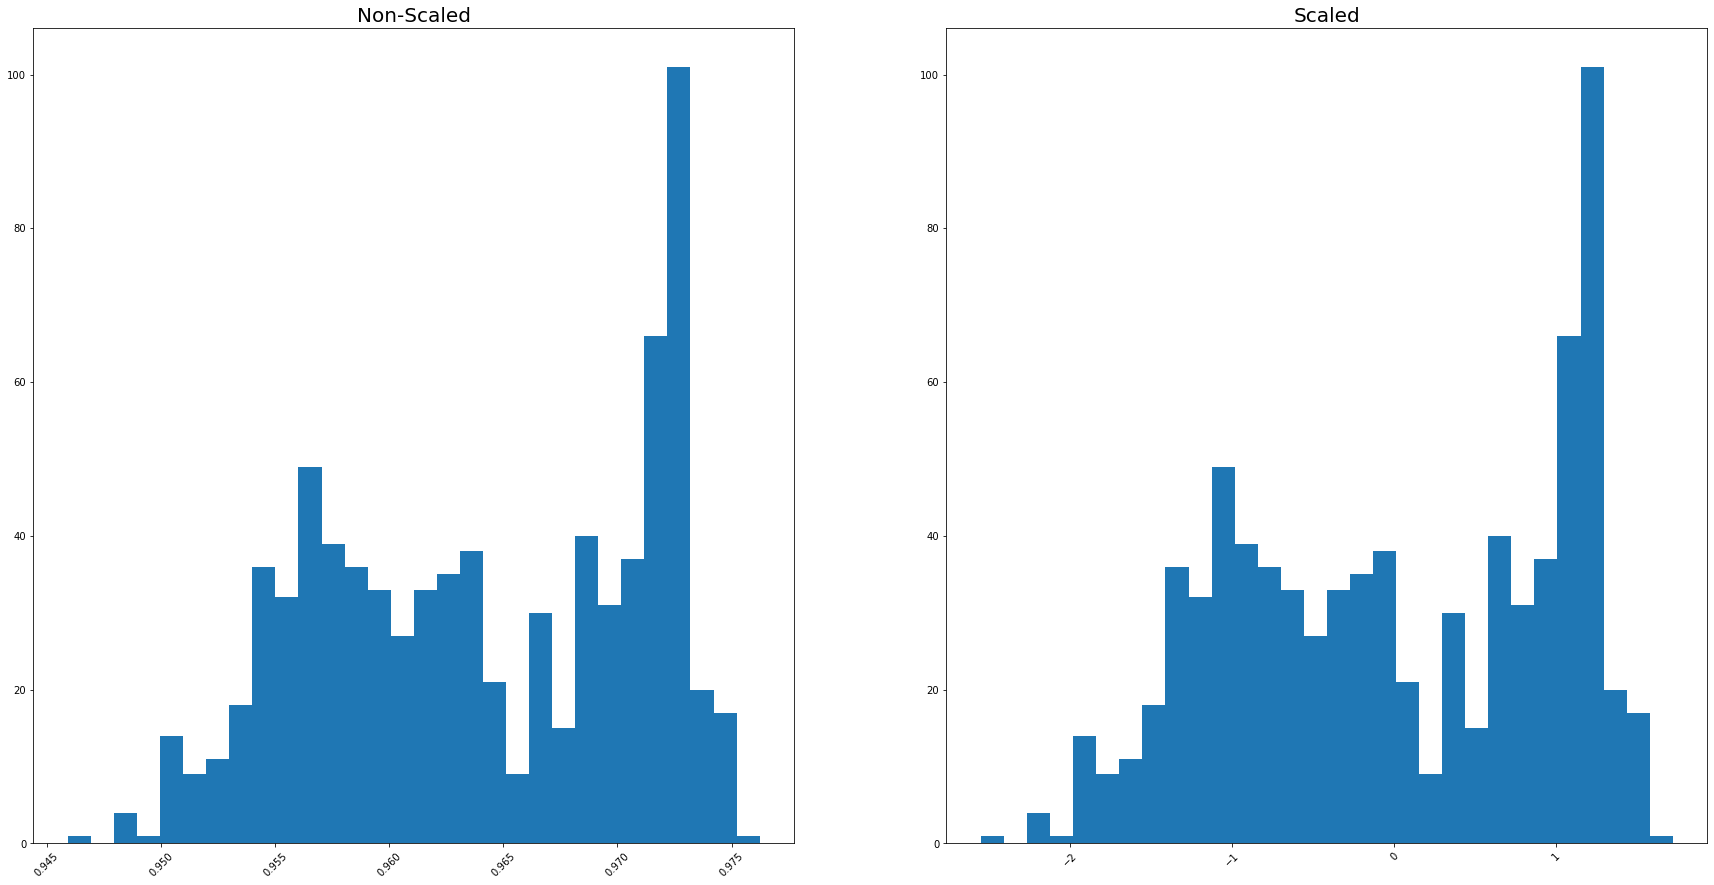

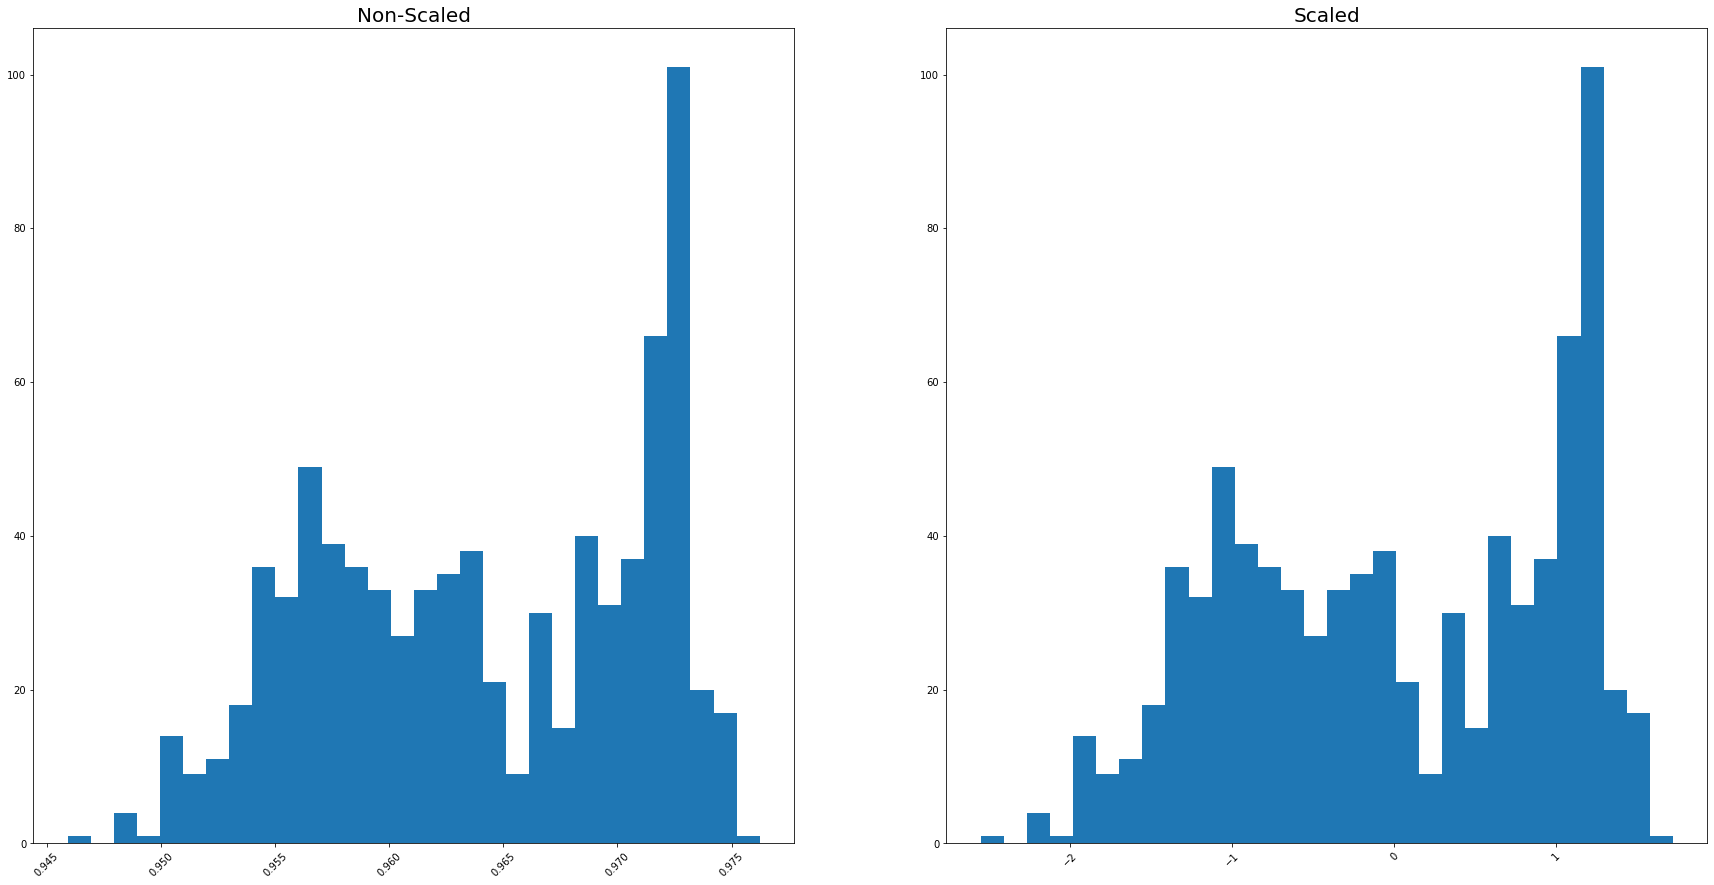

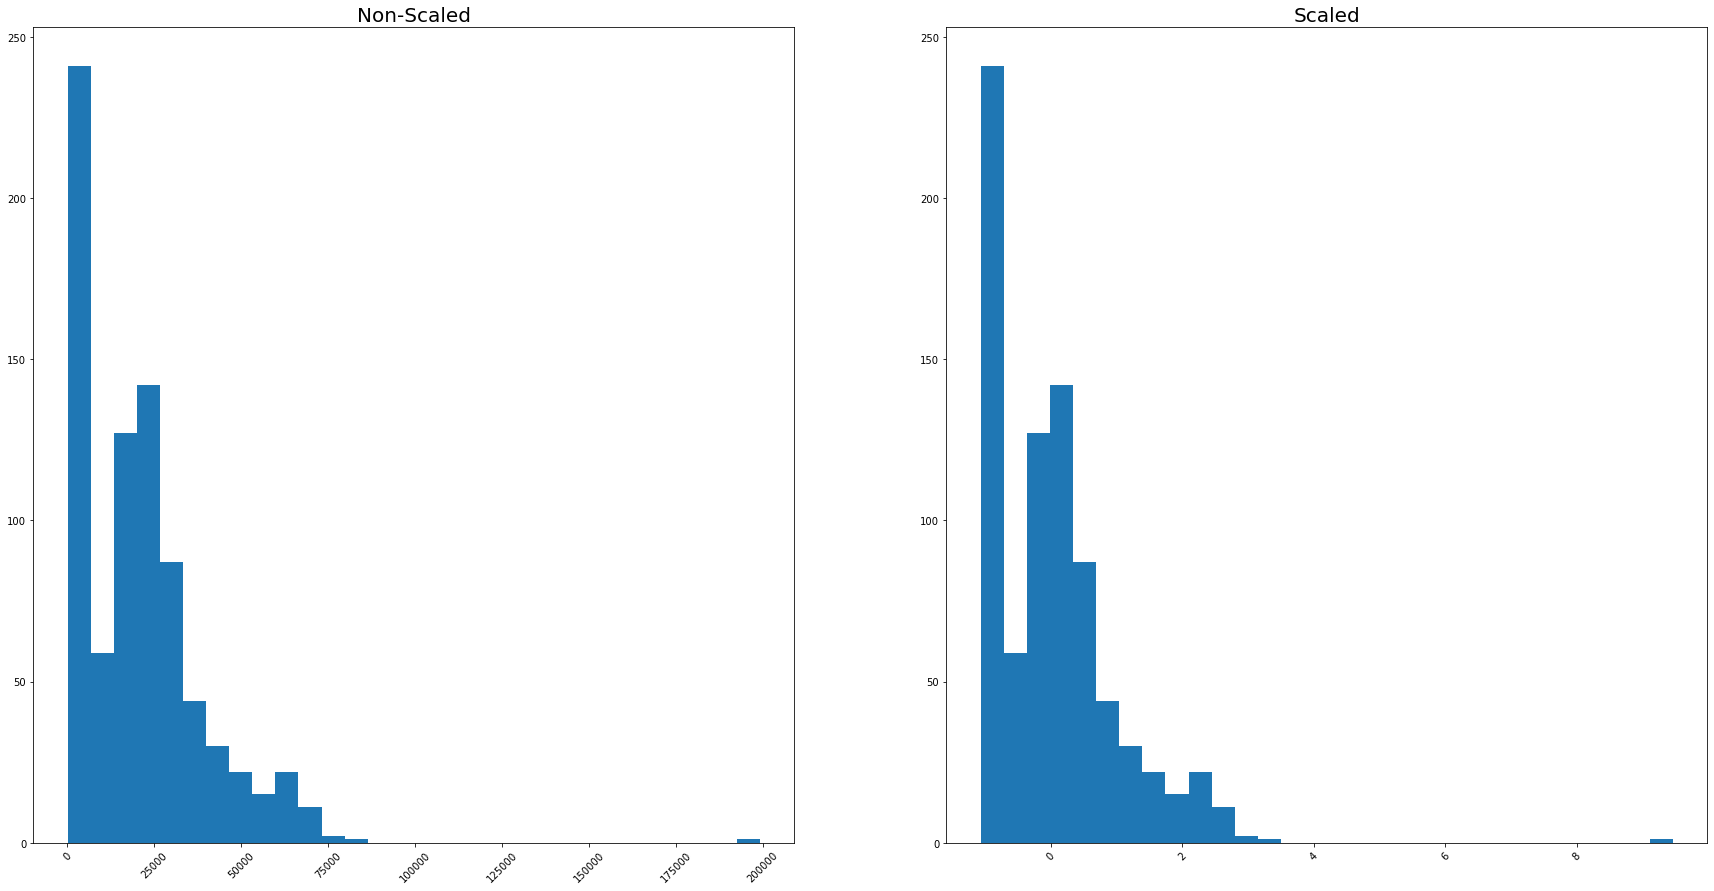

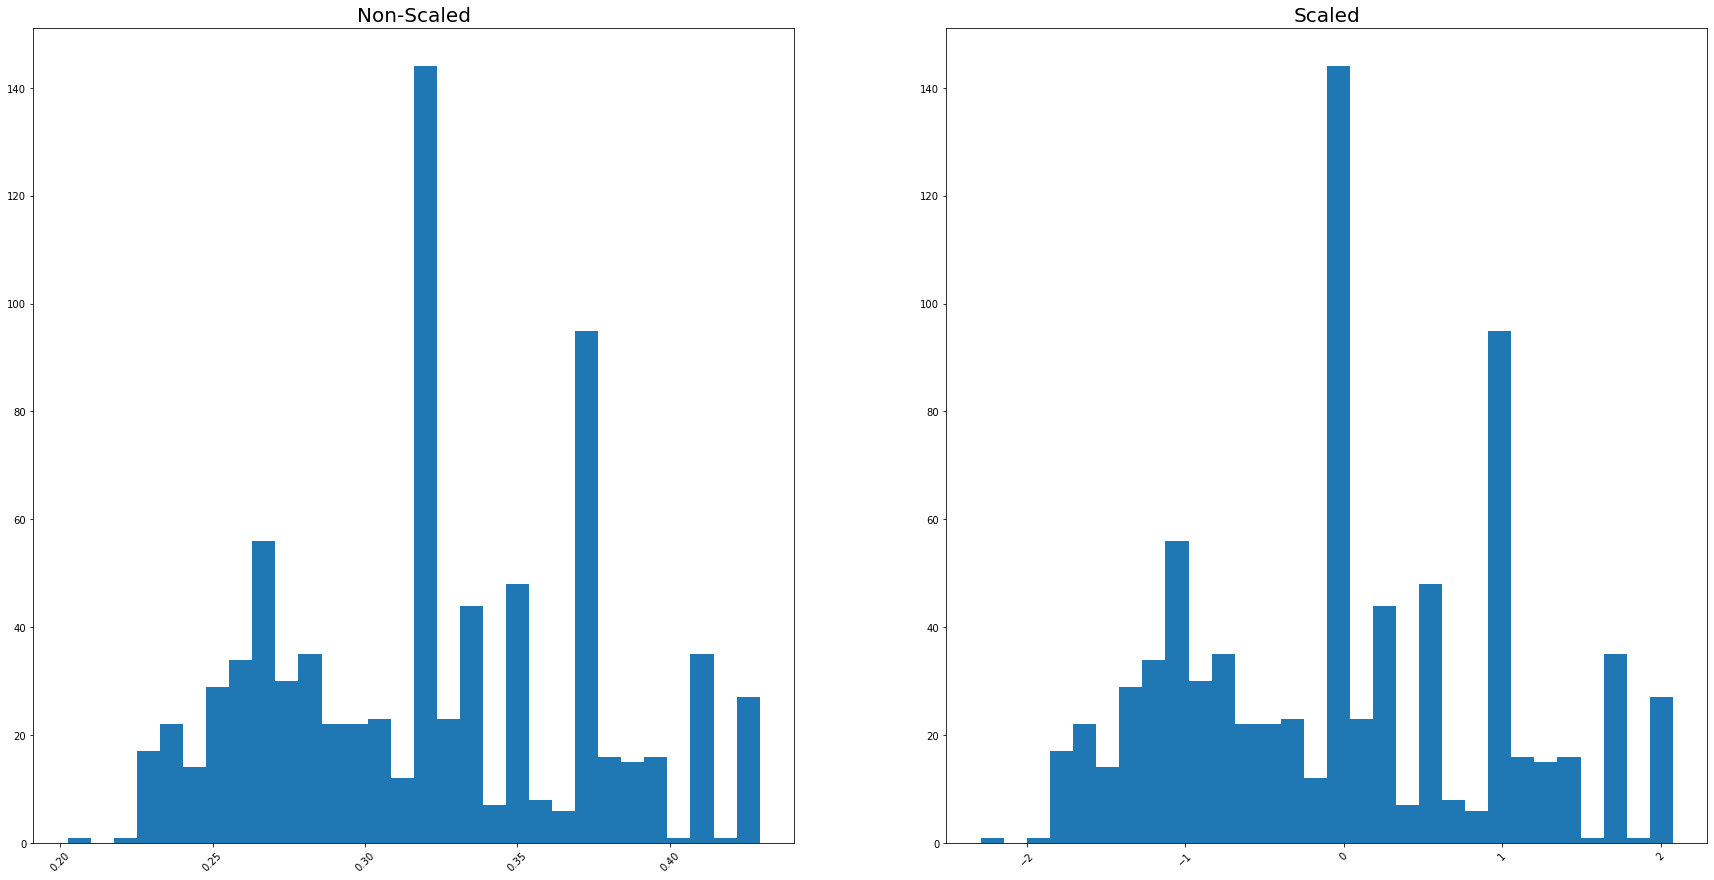

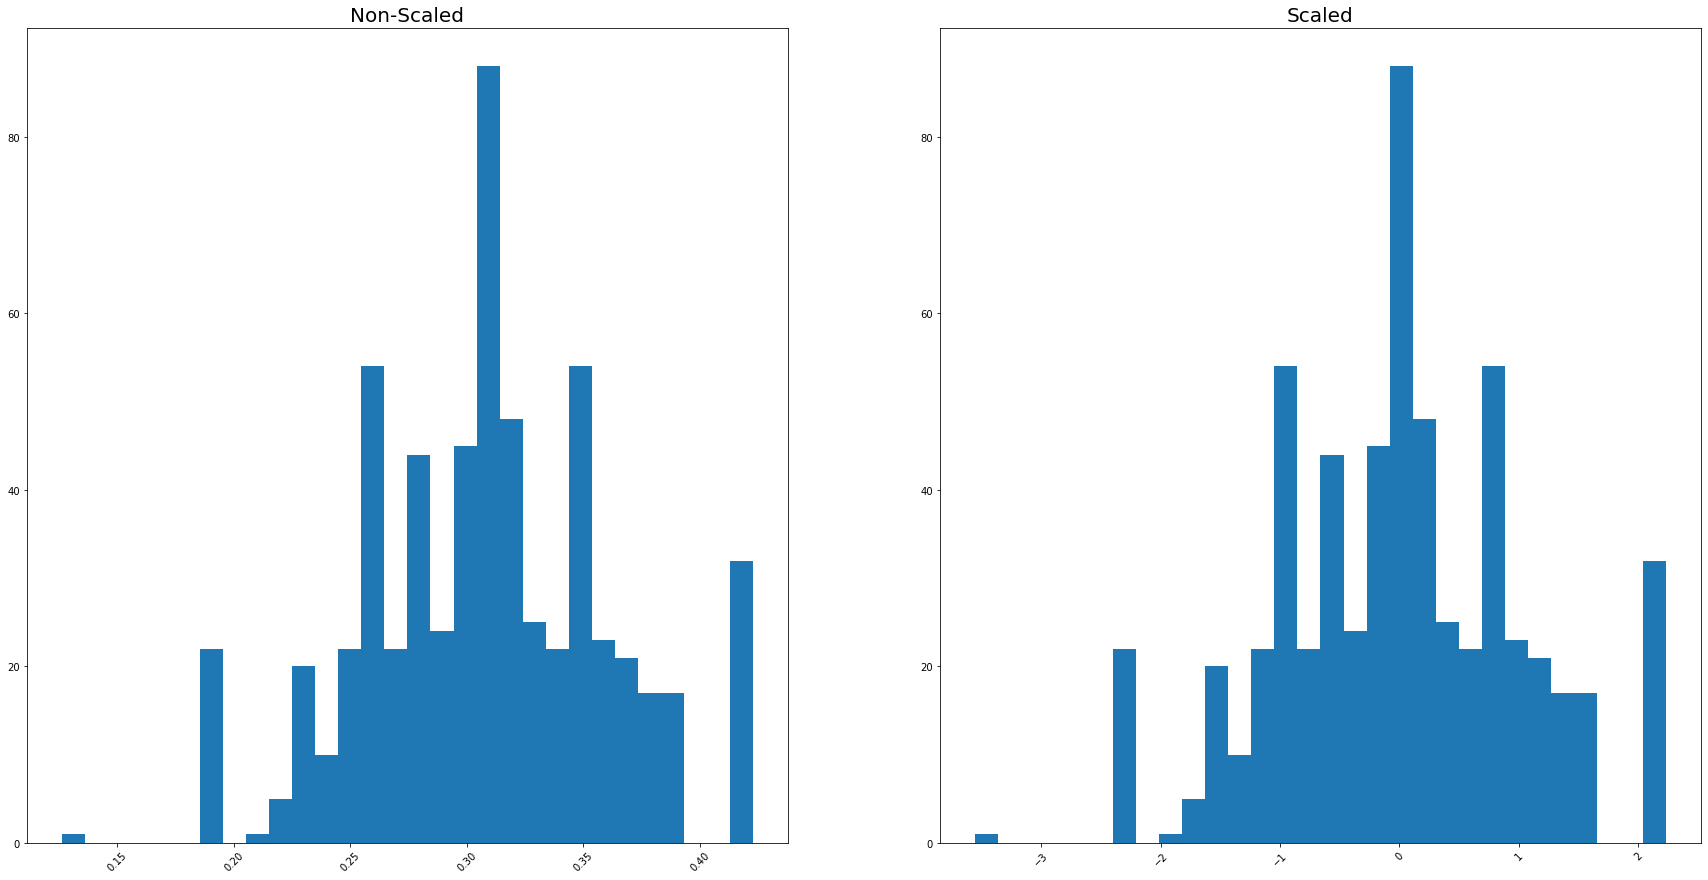

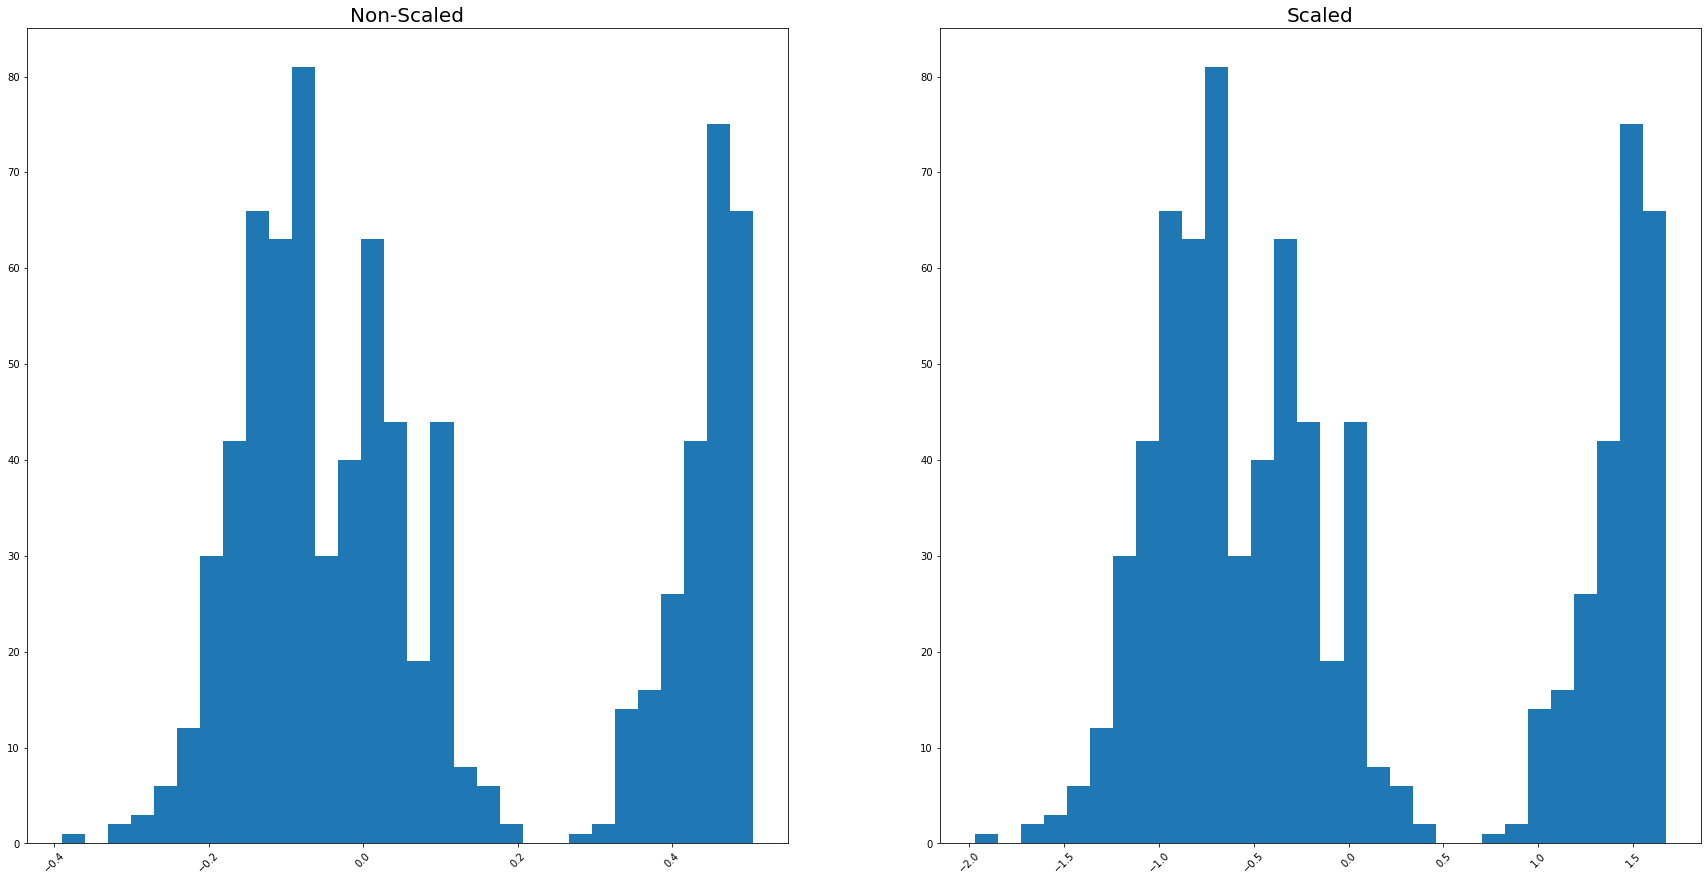

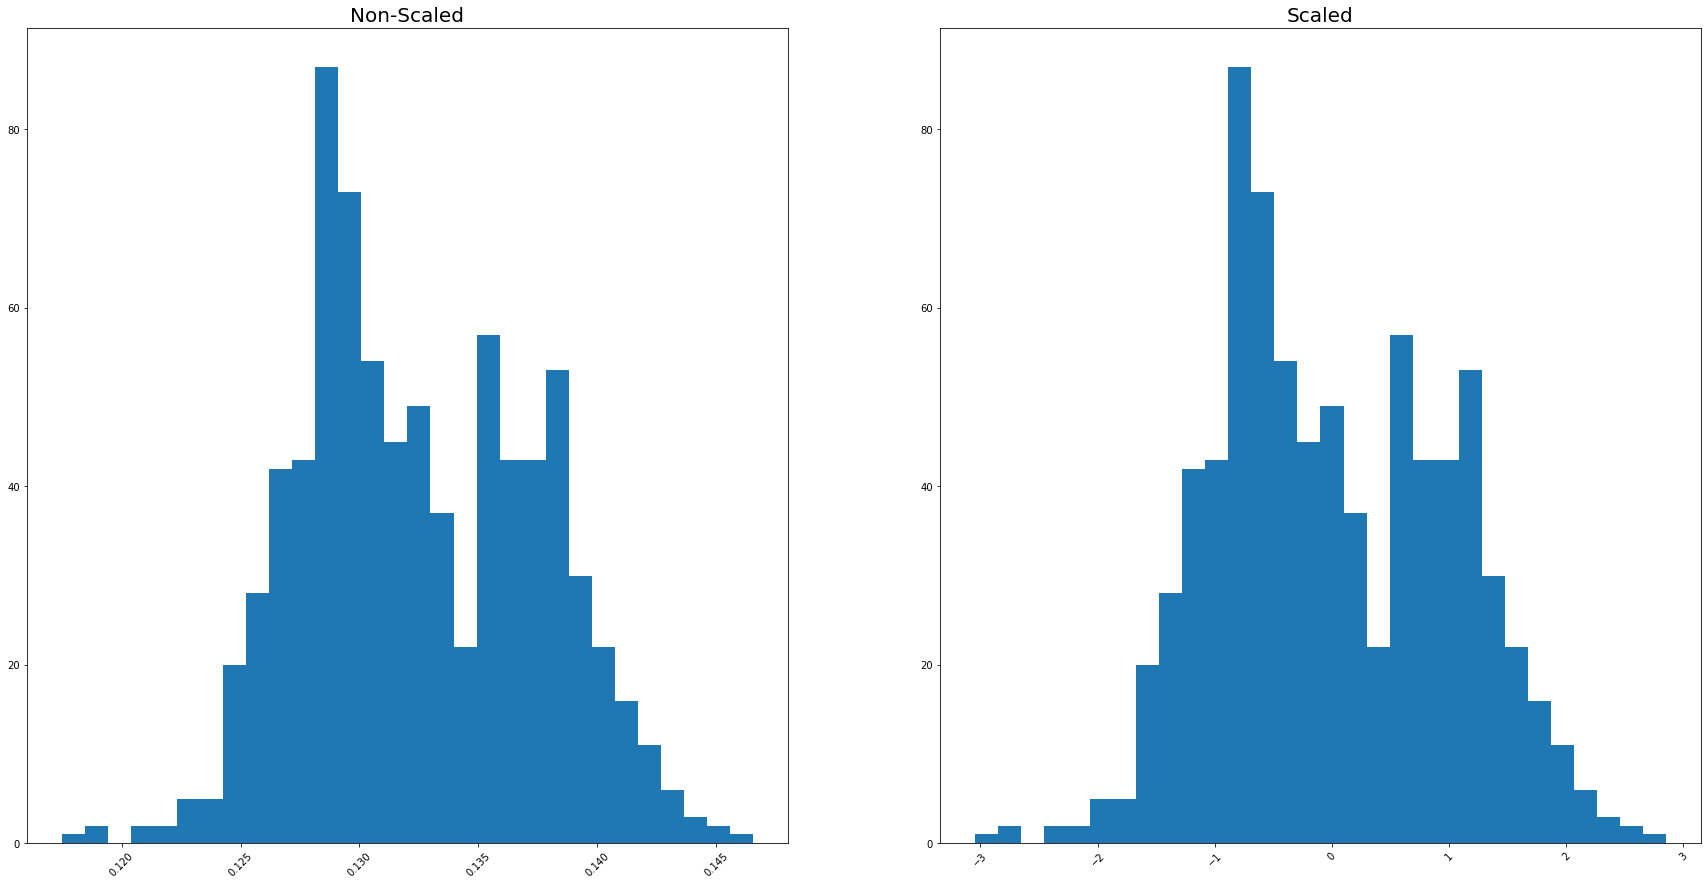

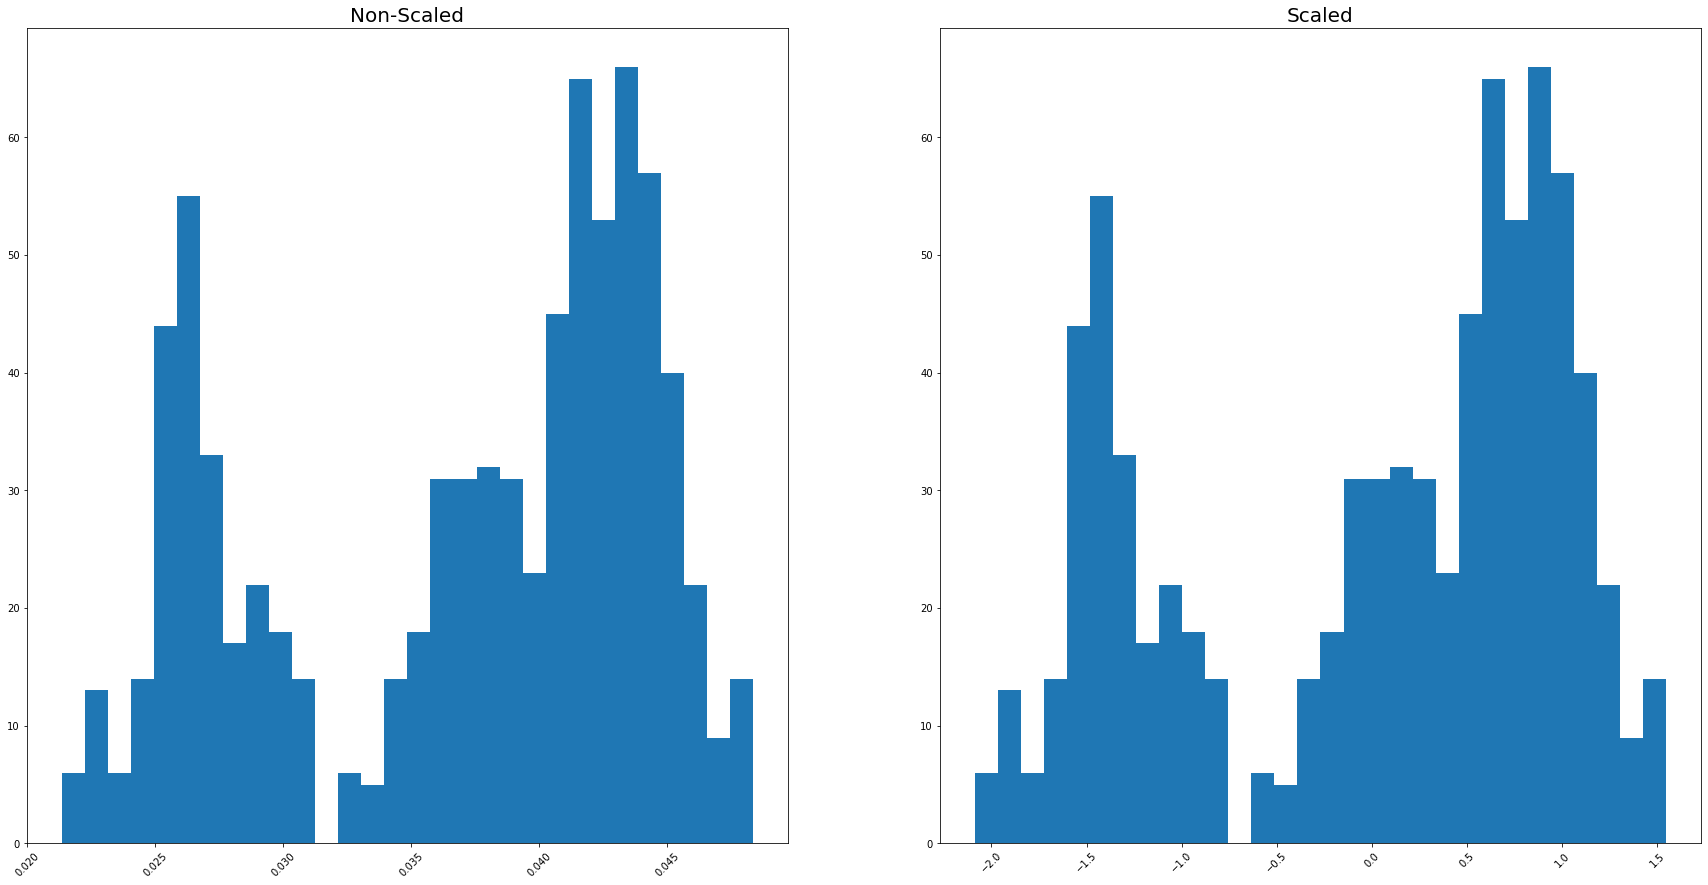

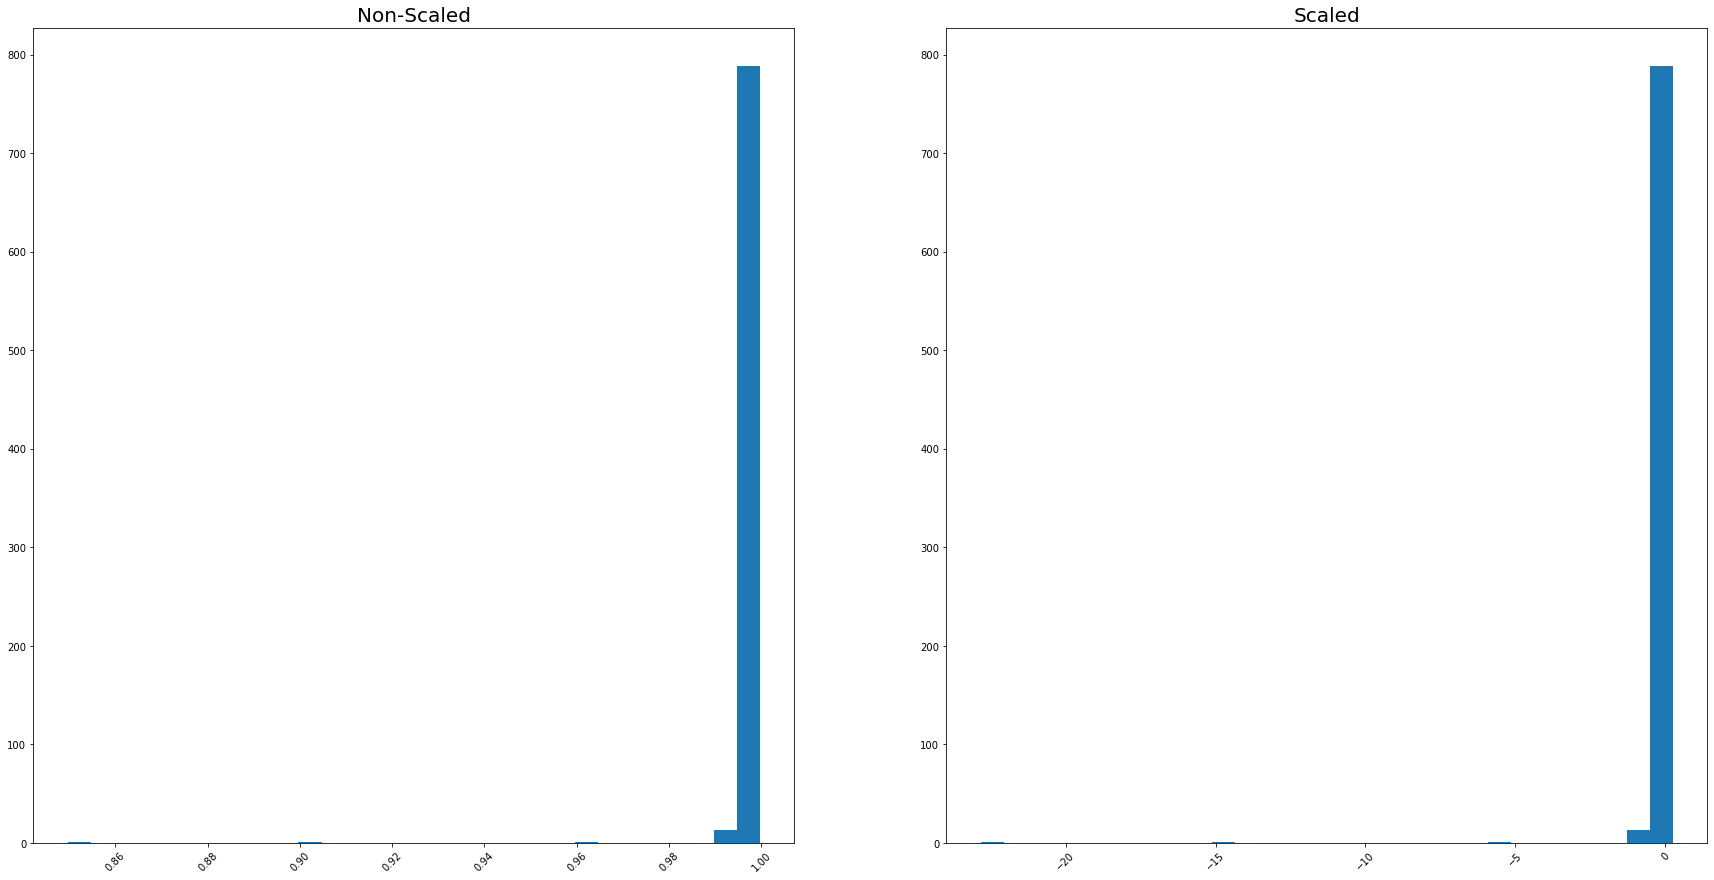

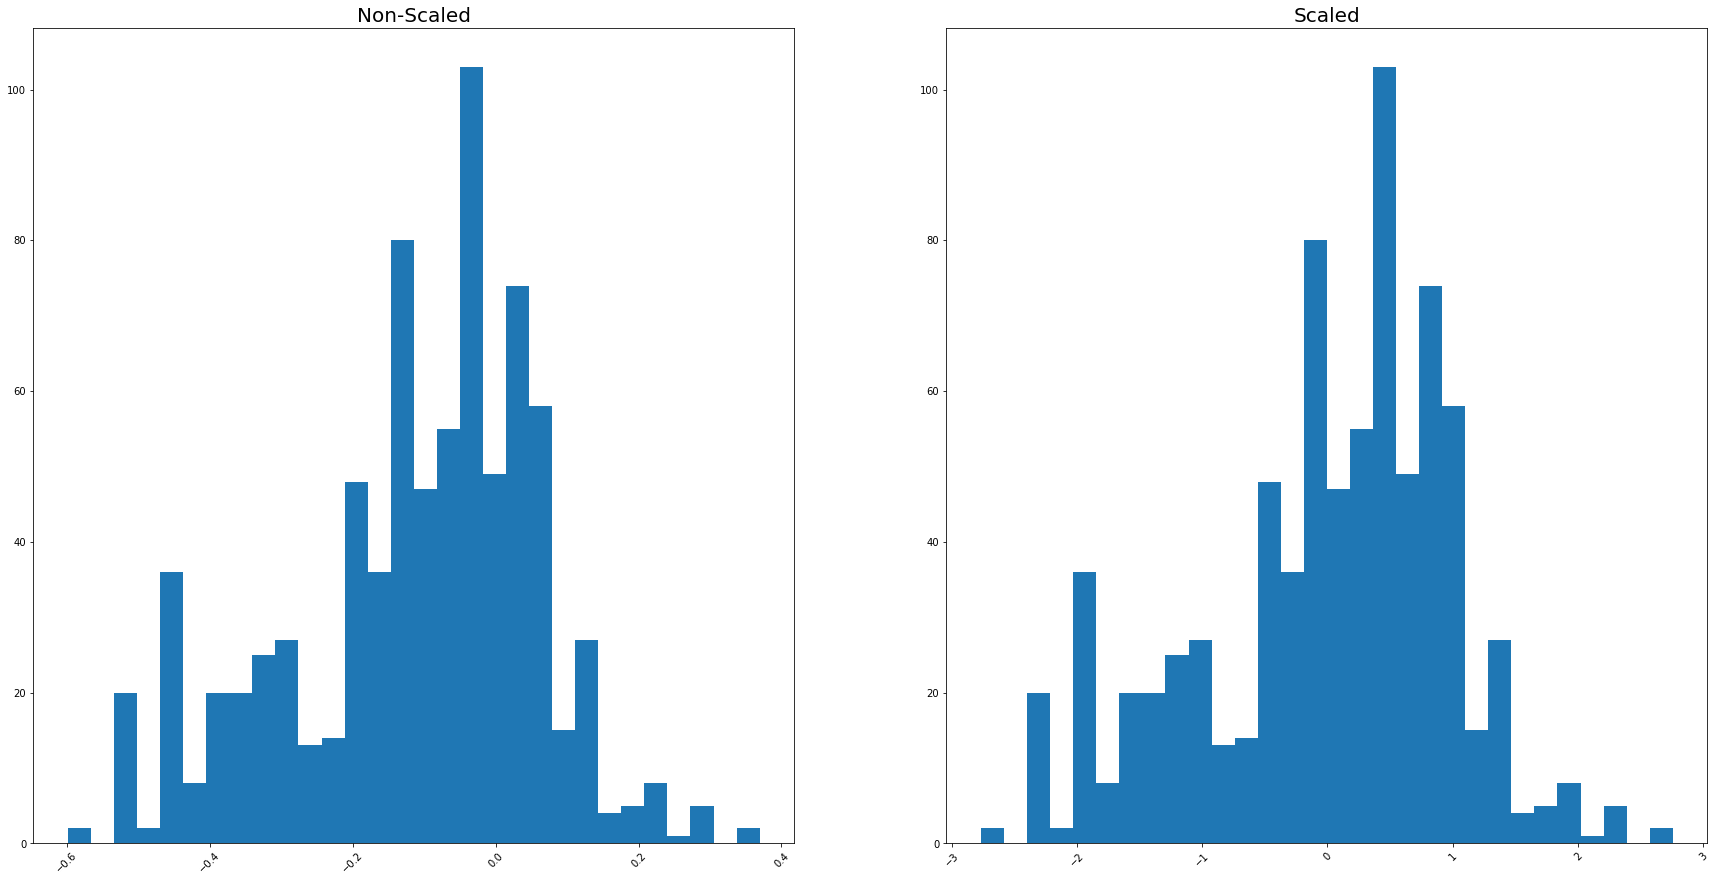

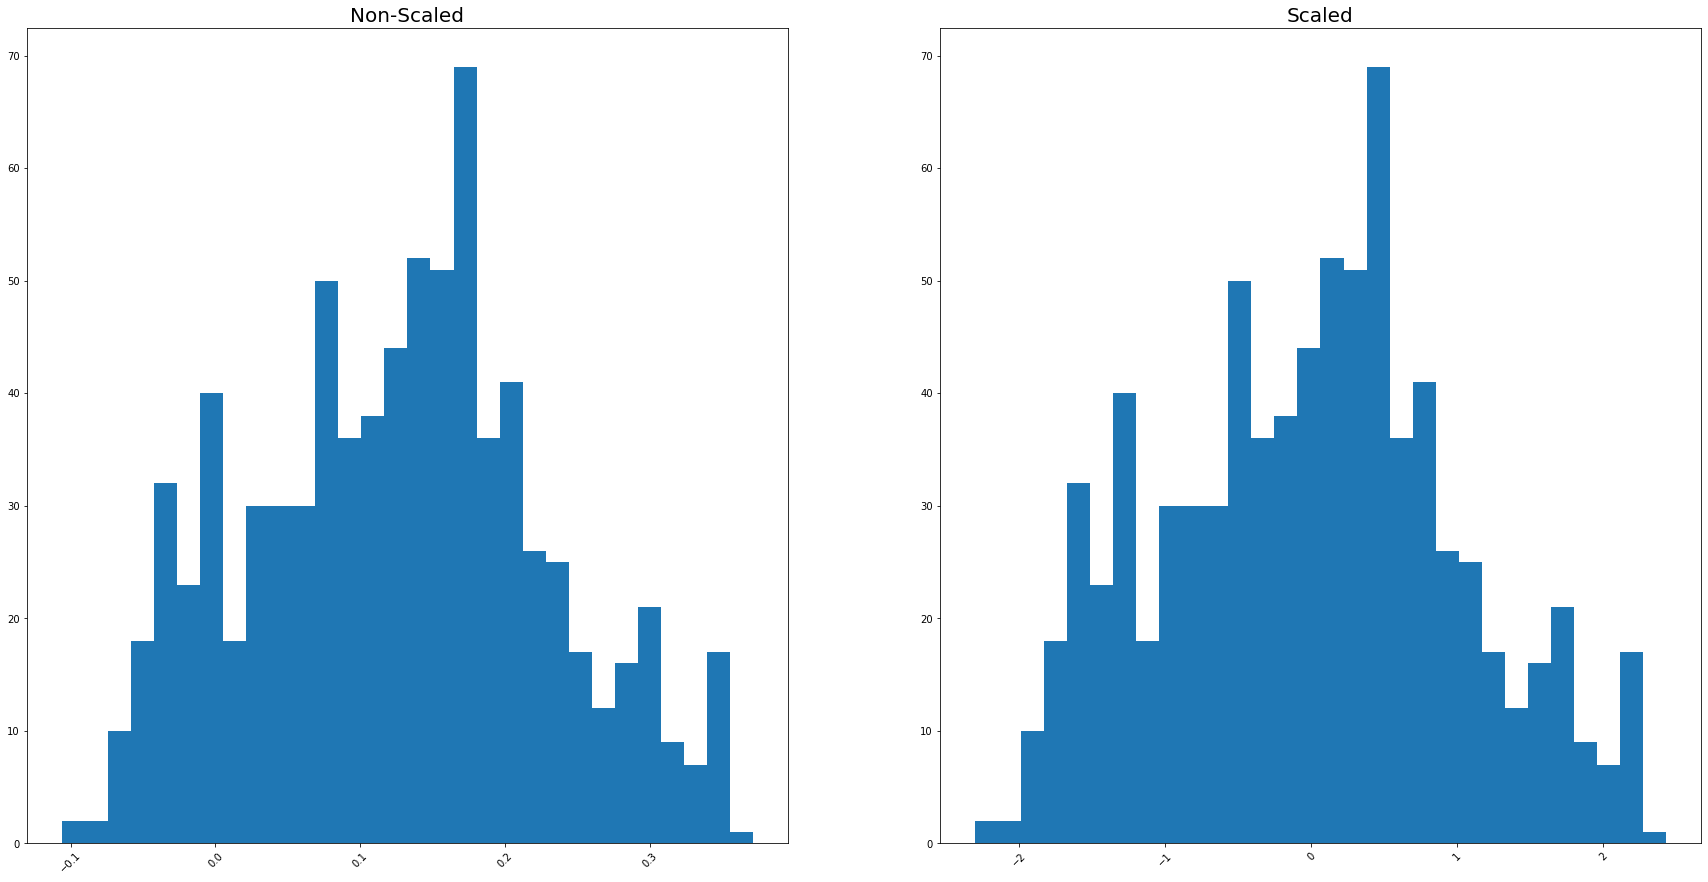

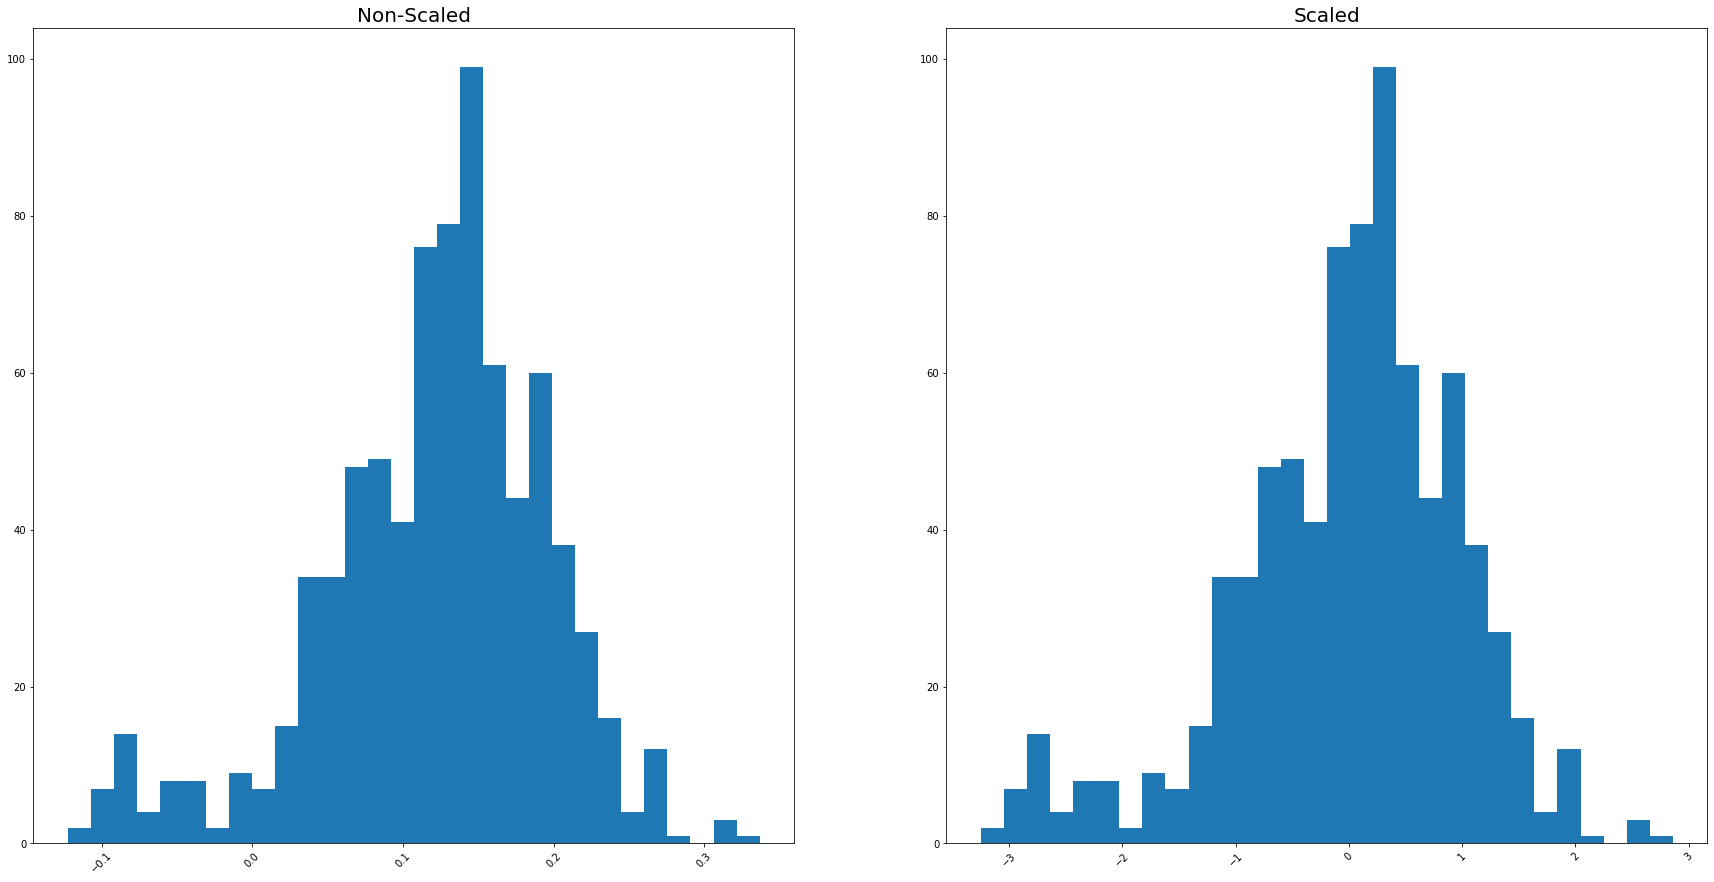

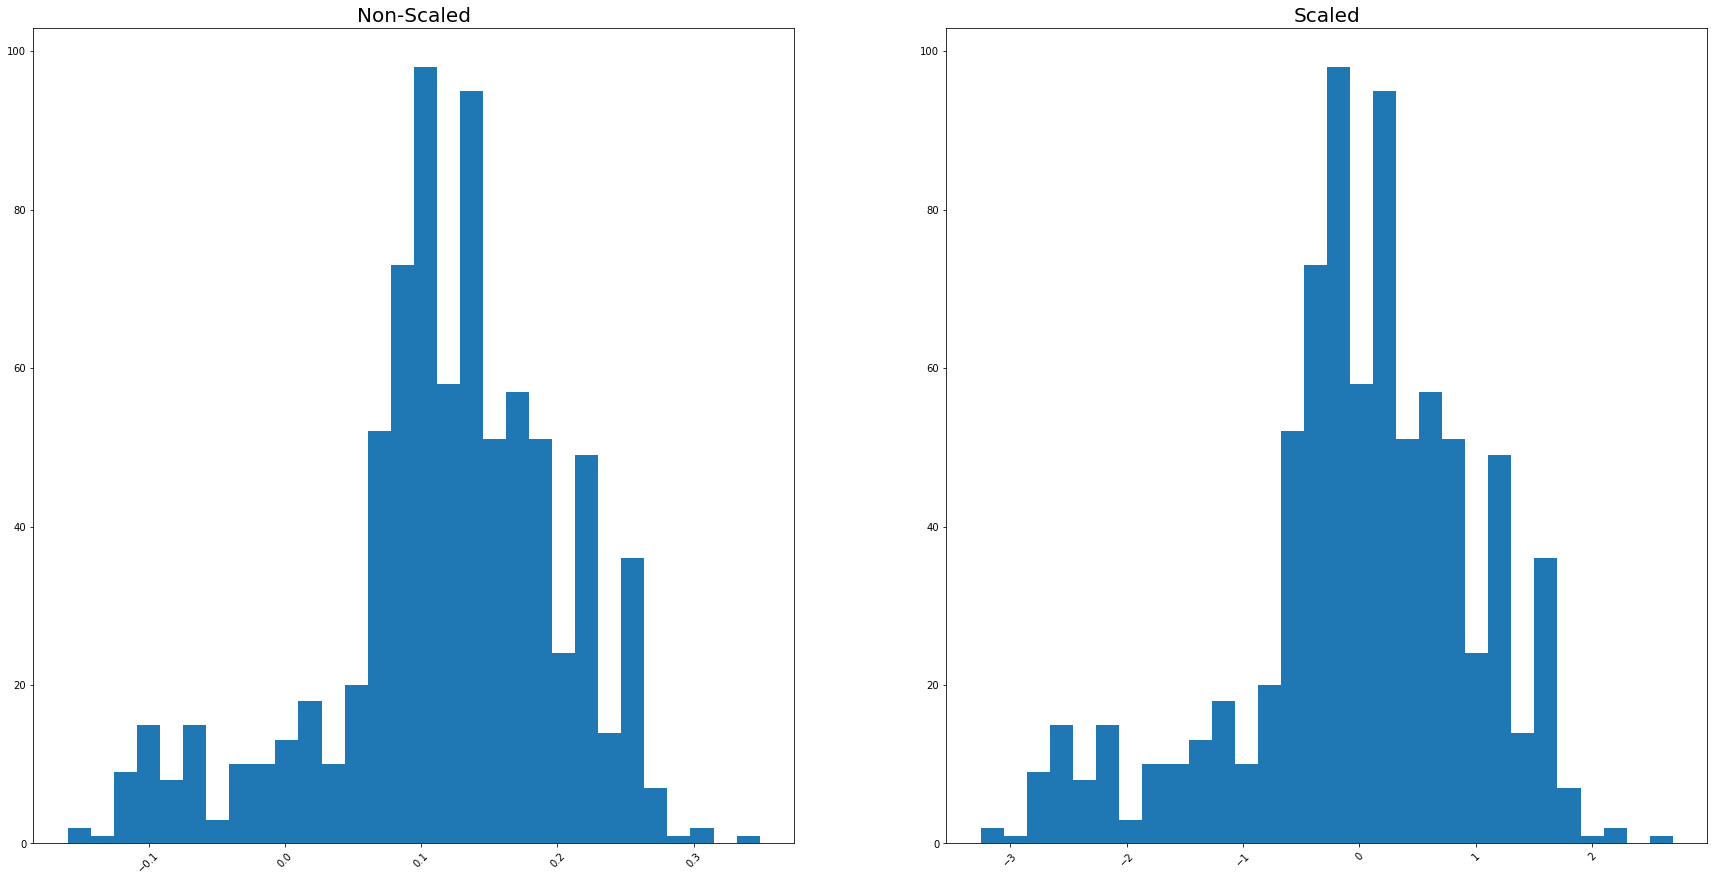

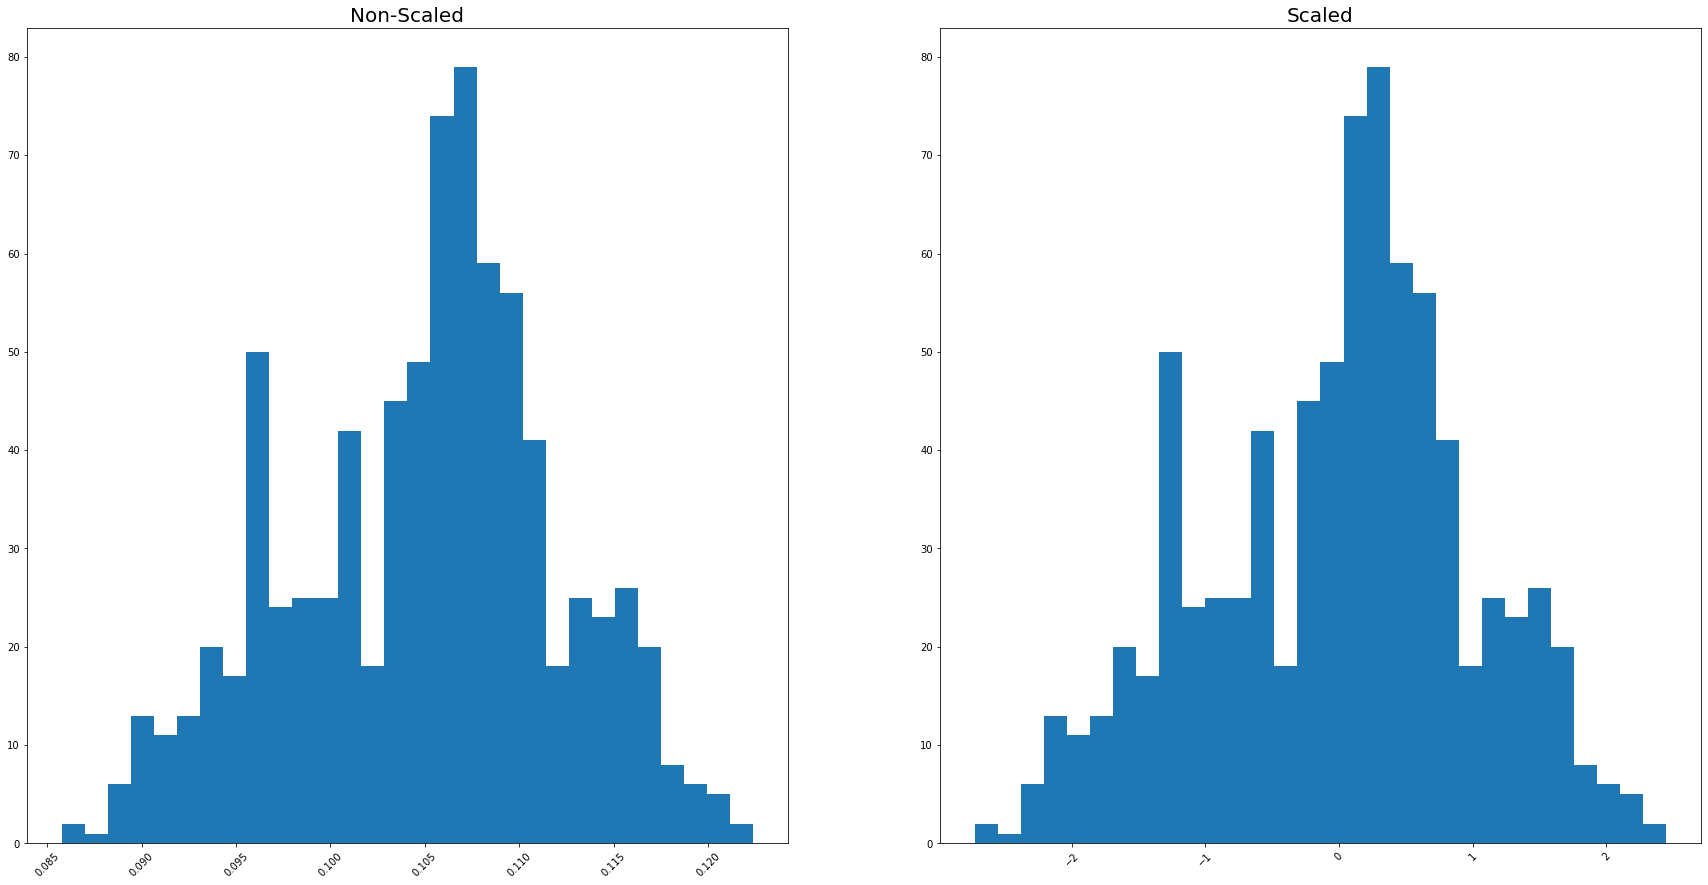

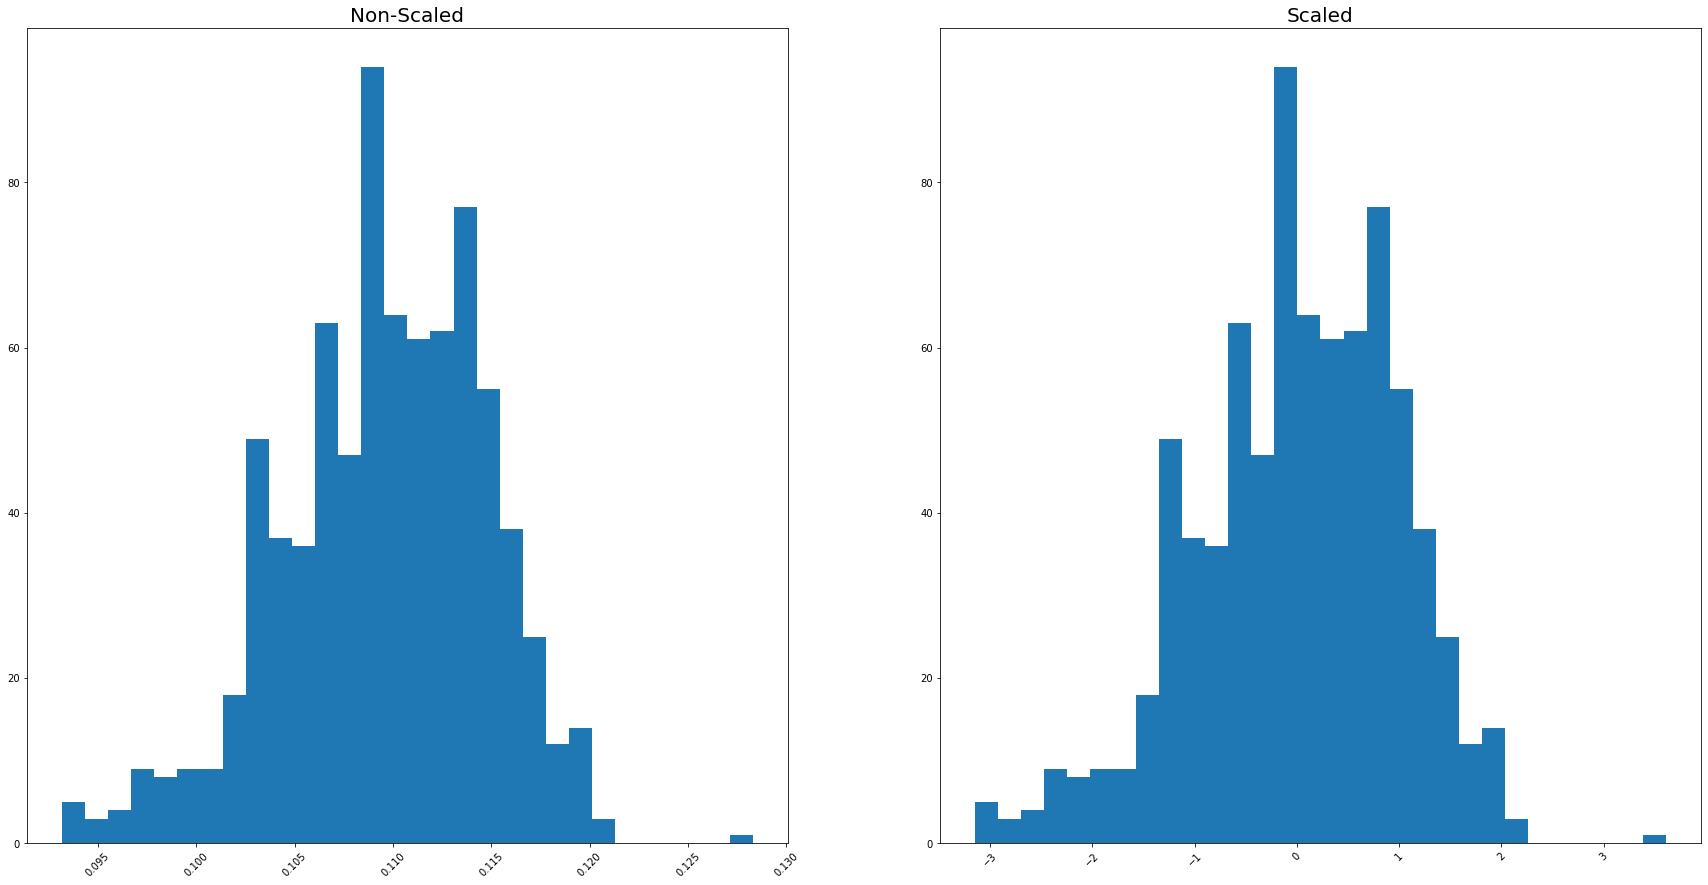

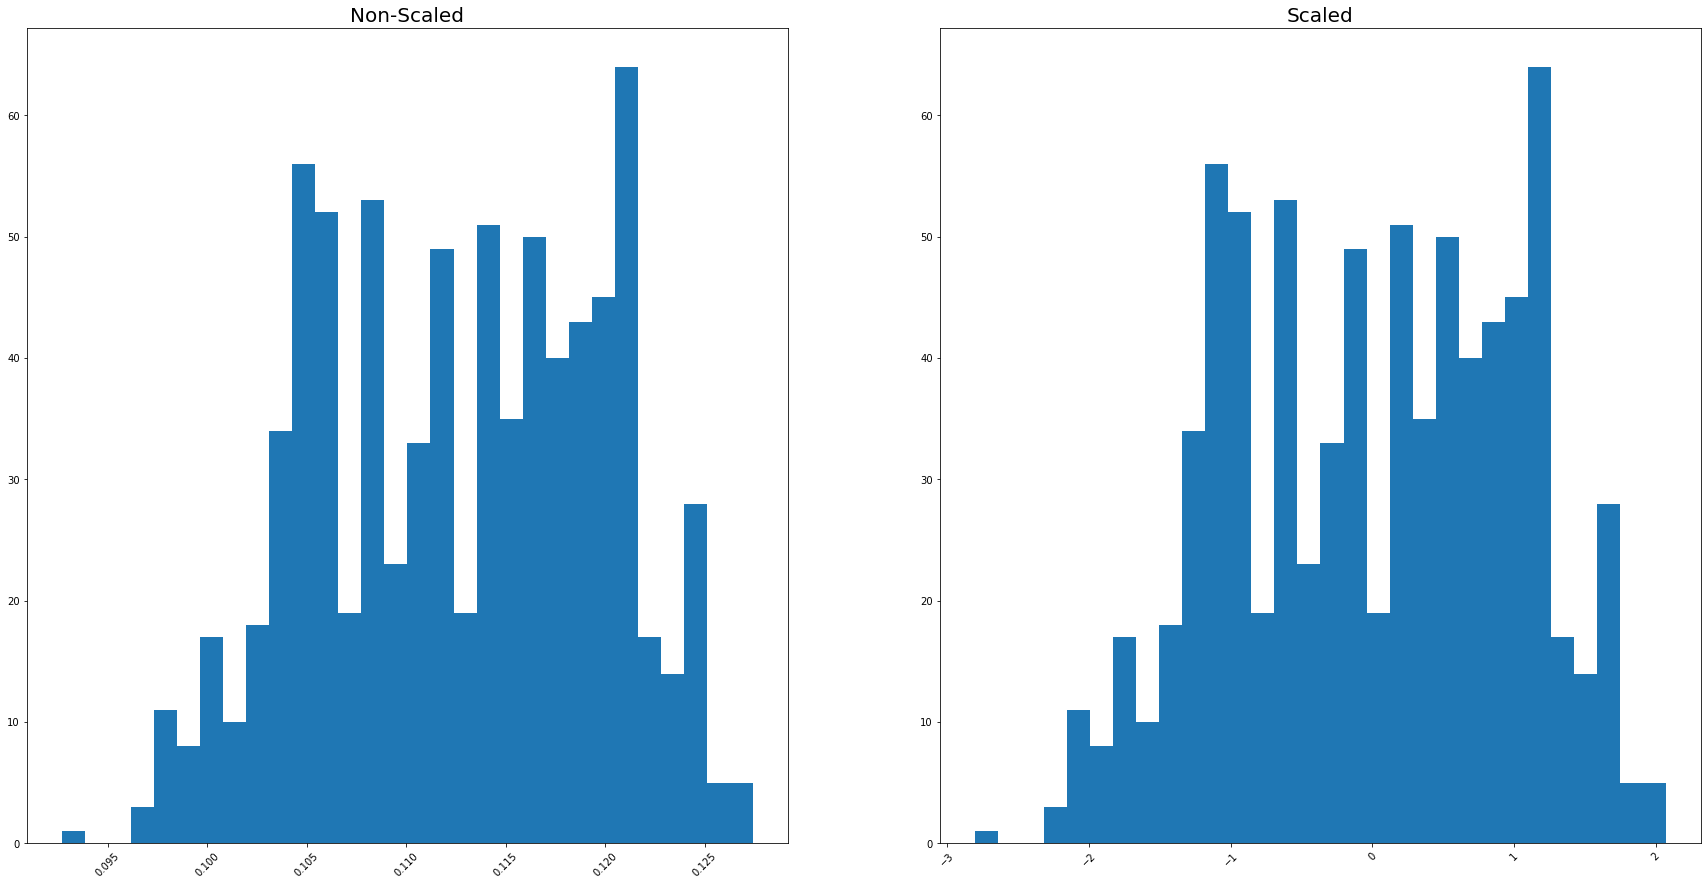

In [35]:
columns_to_plot = [
    "viewCount",
    "likeCount",
    "dislikeCount",
    "num_days_since_pub",
    "viewcounts_weighted",
    "like_count_weighted",
    "dislike_count_weighted",
    "like_dislike_ratio",
    "weighted_like_dislike_ratio",
    "like_dislike_ratio_by_viewcounts_weighted",
    "videoTitleSentimentScore_vader_pos",
    "videoTitleSentimentScore_vader_neg",
    "videoTitleSentimentScore_vader_com",
    "captionSentimentScore_vader_pos",
    "captionSentimentScore_vader_neg",
    "captionSentimentScore_vader_com",
    "falir_videoTitle_score",
    "caption_list_split_by_nvidia_10words_flairscores",
    "caption_list_split_by_nvidia_20words_flairscores",
    "caption_list_split_by_nvidia_35words_flairscores",
    "caption_list_split_by_nvidia_10words_vaderscores",
    "caption_list_split_by_nvidia_20words_vaderscores",
    "caption_list_split_by_nvidia_35words_vaderscores",
]

for x in columns_to_plot:
    fig, ax = plt.subplots(figsize=(30, 15))
    plt.subplot(1, 2, 1)
    plt.hist(hr_merged_df_non_scaled[x], bins=30)
    # set x-axis label
    ax.set_xlabel(x, fontsize=14)
    plt.xticks(rotation=45)
    # set y-axis label
    ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
    plt.title("Non-Scaled", fontsize=20)

    plt.subplot(1, 2, 2)
    plt.hist(hr_merged_df_scaled[x], bins=30)
    # set x-axis label
    ax.set_xlabel(x, fontsize=14)
    plt.xticks(rotation=45)
    # set y-axis label
    ax.set_xlabel(x, fontsize=14)
    ax.set_ylabel("NVDA Price Percent Change +24 Hours", color="red", fontsize=14)
    plt.title("Scaled", fontsize=20)